<a href="https://colab.research.google.com/github/arslonbeksaidov/algo_solutions/blob/master/gusto_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ushbu ma'lumotlar to'plamidan E.V.Steyerbergning "Klinik bashorat qilish modellari" kitobidagi namunaviy ma'lumotlar to'plamidan foydalanilgan. Tavsif 411-betda keltirilgan:

O'tkir miokard infarkti (yurak xuruji) yurak mushagini qon bilan ta'minlaydigan koronar arteriyalardan birida tromb hosil bo'lishidan kelib chiqadi. O'tkir MI sog'liqni saqlashning asosiy muammosidir. Yoshga qarab kasalxonaga yotqizish darajasi
Qo'shma Shtatlarda miyokard infarkti 1000 ayolga 2 ta, erkaklar uchun esa 4 taga to'g'ri keladi. 350 O'lim voqea sodir bo'lgandan keyingi davrda, shuningdek, dastlabki infarktdan omon qolgan yillar davomida sezilarli. Ba'zi bemorlar kasalxonaga yetmasdan vafot etadi. Kasalxonaga yotqizilgan bemorlarning o'rtacha 30 kun ichida o'lim darajasi taxminan 6-15% ni tashkil qiladi.
30 kunlik o'lim xavfi turli prognostik omillarga kuchli bog'liq (22.1-jadval). Yosh bemorlarda xavflar keksa bemorlarga qaraganda ancha past. Bemorning boshqa demografik ma'lumotlari (jinsi, uzunligi, vazni), shuningdek, xavf omillarining mavjudligi (gipertenziya, diabet, chekish, oilaviy tarix) va oldingi yurak-qon tomir kasalliklari tarixi (oldingi MI, angina, insult, bypass operatsiyasi) ham muhimdir. . Tegishli taqdimot xususiyatlariga infarktning joylashuvi va EKG anormalliklari darajasi kiradi. Bemorning qon bosimi, yurak urish tezligi va chap qorincha funktsiyasi (Killip klassi, zarba mavjudligi) bilan aks ettirilgan o'tkir holati juda muhimdir.

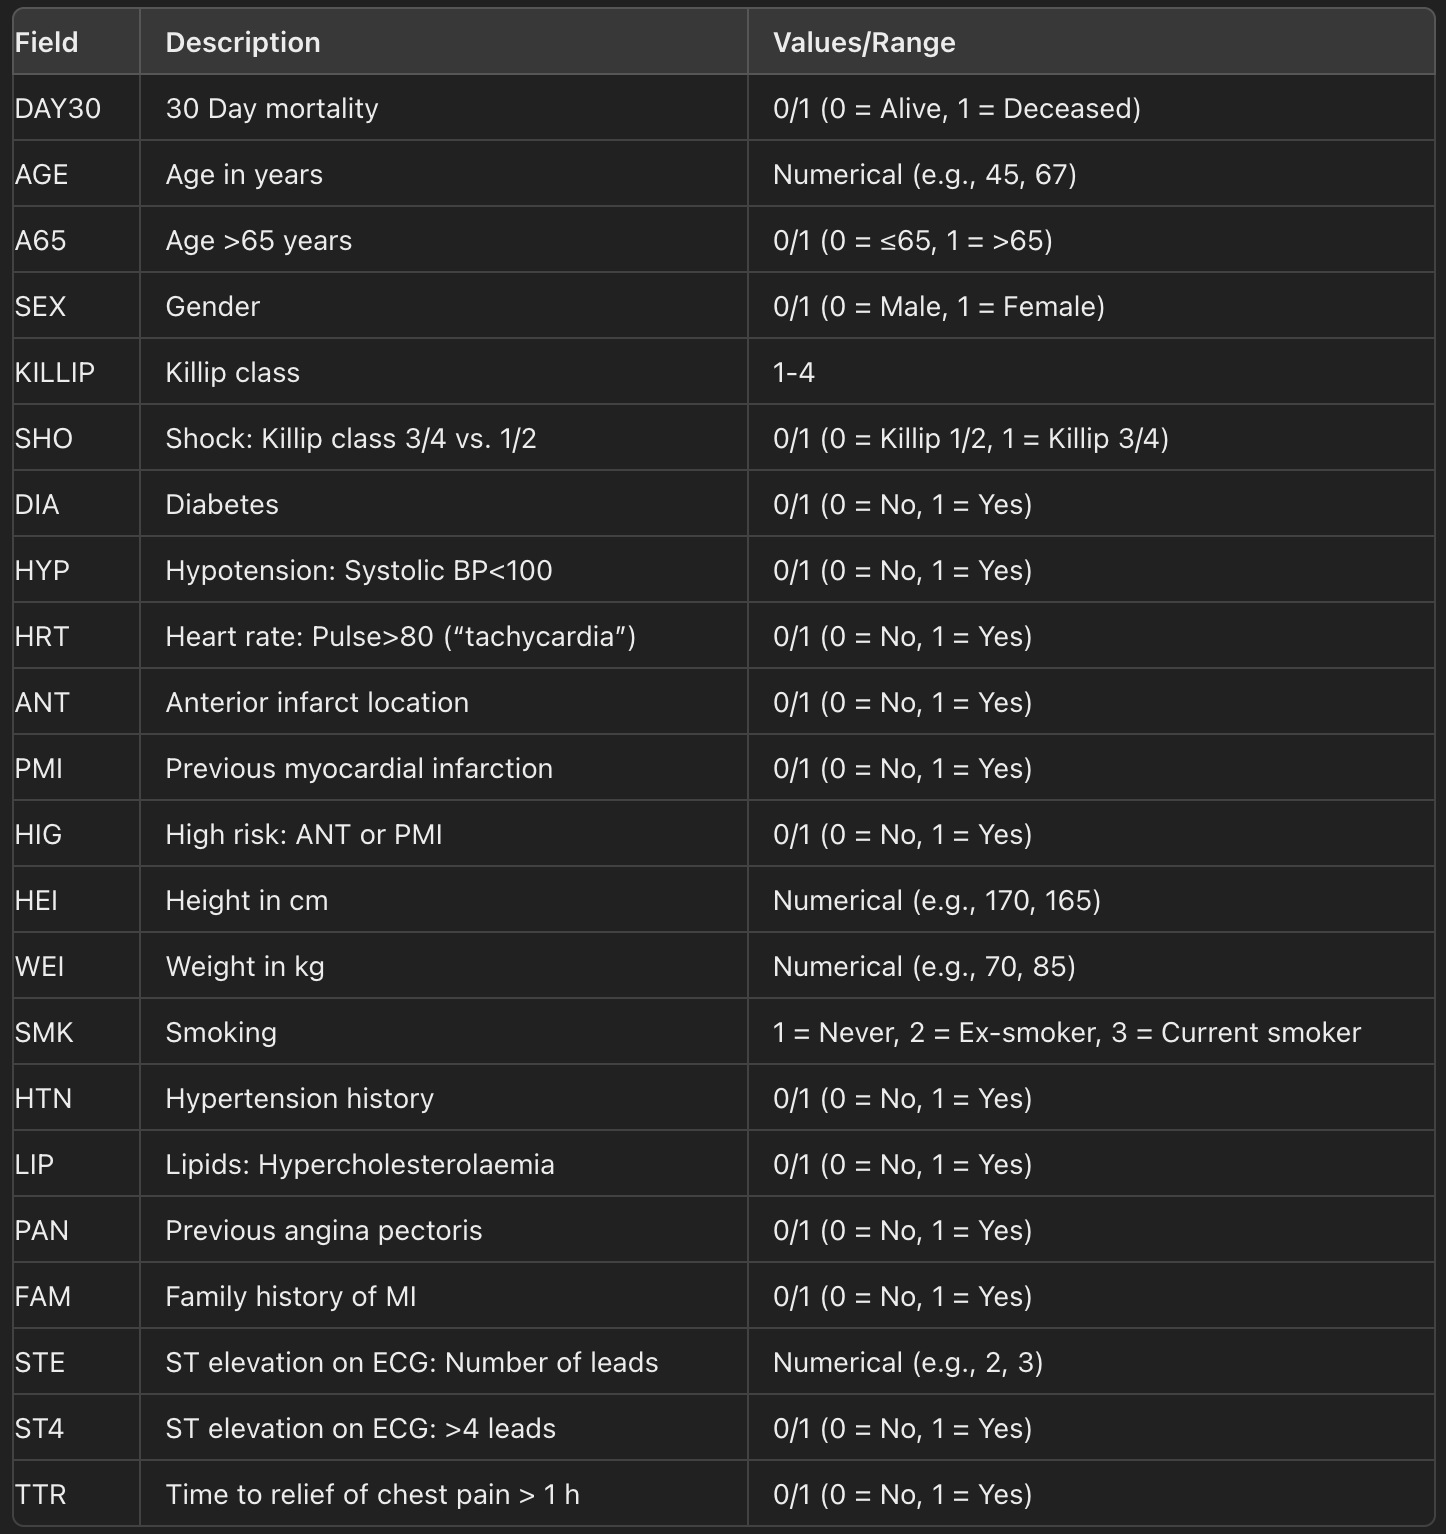

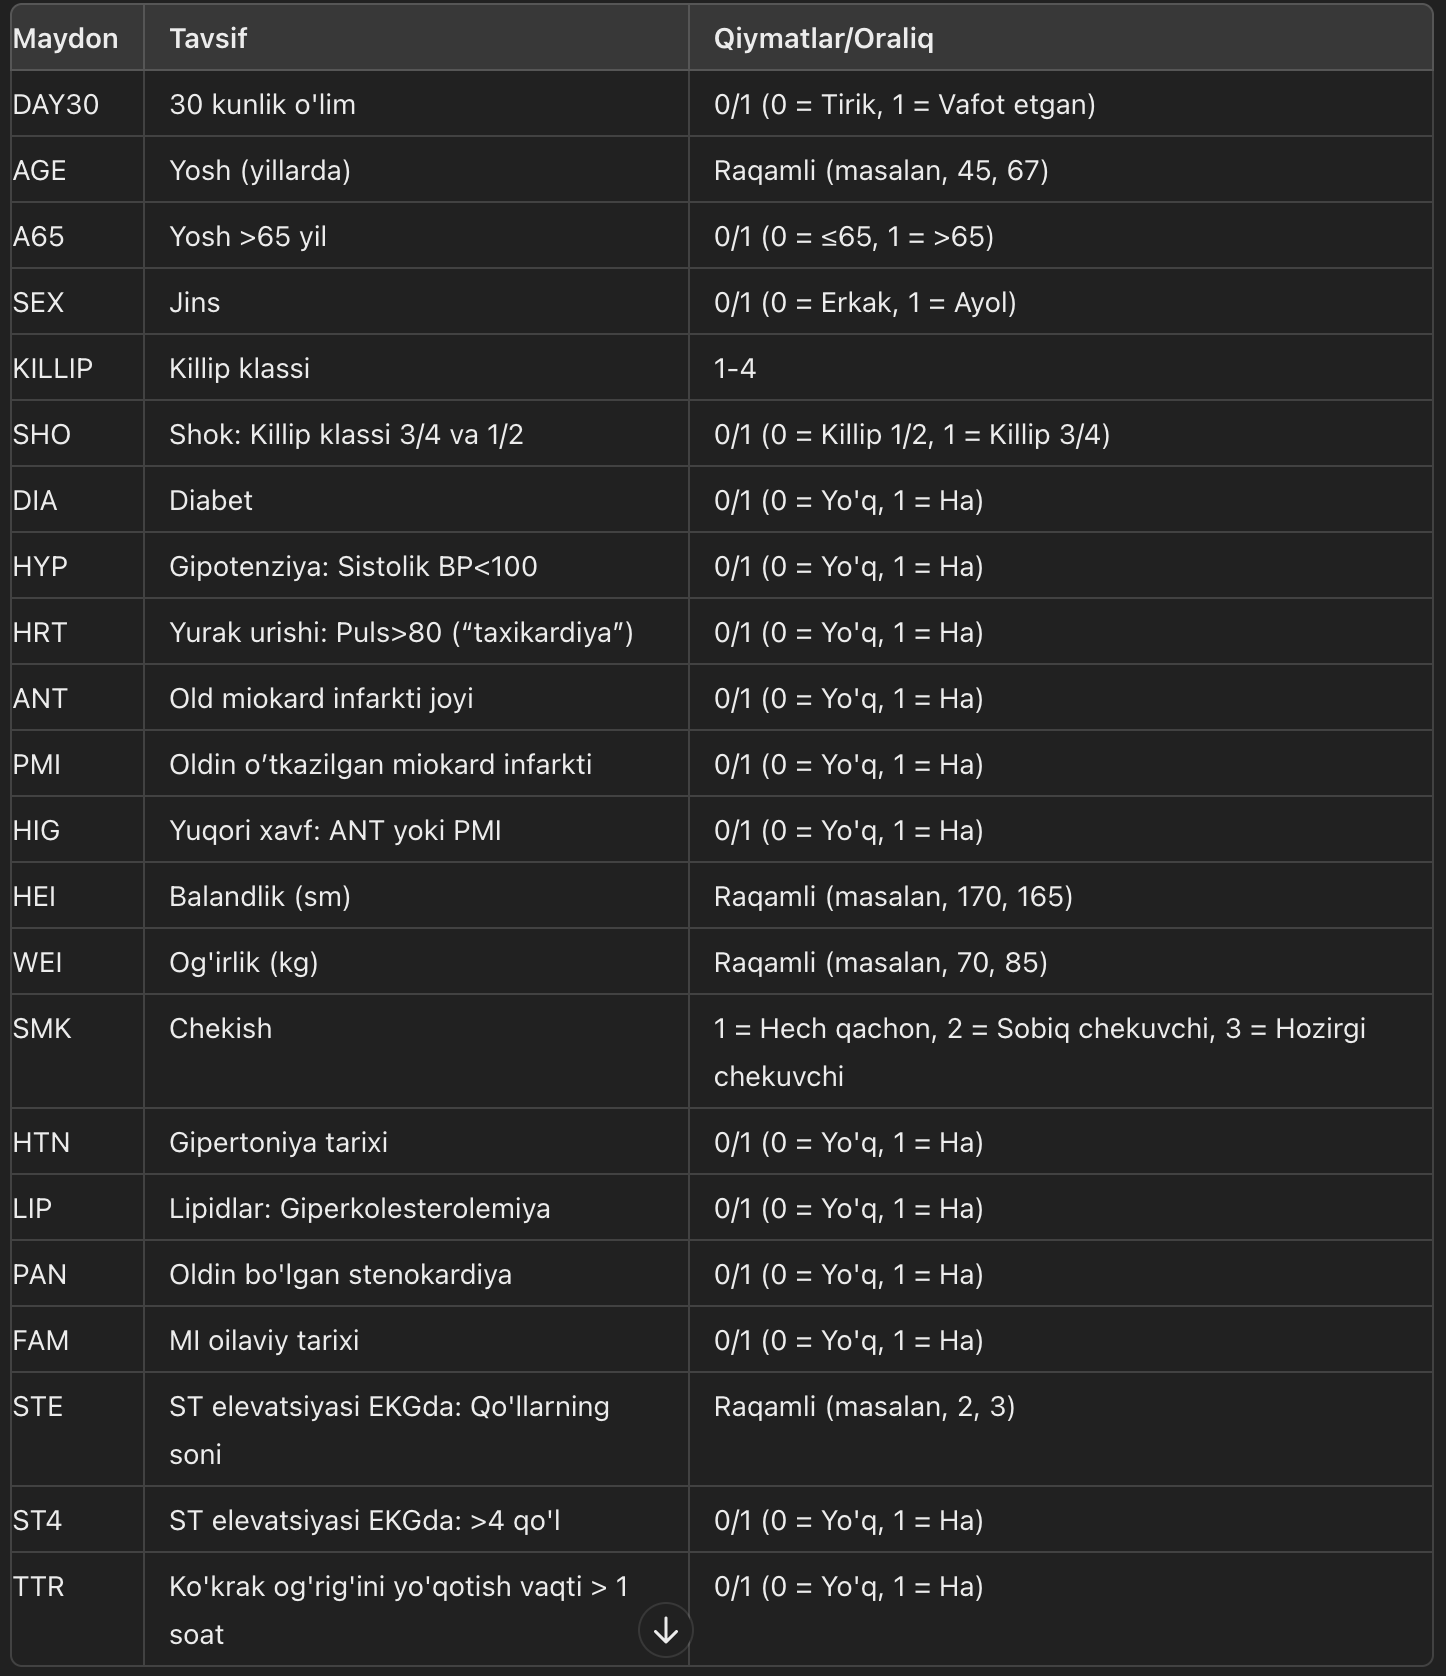

Killip klassi (Killip class) yurak yetishmovchiligini baholash uchun ishlatiladigan klinik tasniflash tizimidir. Bu sinflar miokard infarktidan keyin yurak yetishmovchiligining darajasini belgilashda yordam beradi. Killip klassi quyidagi toifalarga bo'linadi:

    Killip Class 1: Yurak yetishmovchiligi belgilarining yo'qligi.
    Killip Class 2: O'rtacha darajada yurak yetishmovchiligi (o'pka konjesiyasi yoki cheklangan yurak yetishmovchiligi).
    Killip Class 3: Og'ir darajada yurak yetishmovchiligi (og'ir o'pka konjesiyasi yoki o'pka shishi).
    Killip Class 4: Kardiogen shok (og'ir past qon bosimi va a'zolar perfuziyasining buzilishi bilan tavsiflanadi).

KILLIP parametri ushbu sinflardan birini (1 dan 4 gacha) o'z ichiga oladi va bemorning yurak yetishmovchiligining darajasini aniqlash uchun ishlatiladi.


SHO (Shok) parametri Killip klassi 3 yoki 4 bo'lgan bemorlarni 1 yoki 2 sinflarga nisbatan ajratib turadi. Bu parametr bemorning shok holatida ekanligini yoki yo'qligini aniqlashda yordam beradi.

SHO parametri quyidagicha bo'ladi:

    0: Bemor Killip klassi 1 yoki 2 (shok holati yo'q).
    1: Bemor Killip klassi 3 yoki 4 (shok holati mavjud).

Shunday qilib, SHO parametri bemorning shok holatida ekanligini aniqlash uchun ishlatiladi va bu yurak yetishmovchiligining og'irligini ko'rsatadi.

In [ ]:
import pandas as pd
import numpy as np
import sklearn # scikit-learn kutubxonasi
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
Path = "https://raw.githubusercontent.com/arslonbeksaidov/dataset/main/full_data_set_gusto.csv"
training_df = pd.read_csv(Path)
training_df = training_df.drop(['DAY30_Probability'], axis=1)
training_df.head()


,DAY30,SEX,AGE,A65,KILLIP,SHO,DIA,HYP,HRT,ANT,...,HEI,WEI,HTN,SMK,LIP,PAN,FAM,STE,ST4,TTR
0,0,0,70.313,1,1,0,0,0,0,1,...,177.3,84.0,1,3,1,0,0,1,0,1
1,0,0,59.844,0,1,0,1,0,0,1,...,172.0,115.0,1,1,0,0,1,6,1,0
2,0,0,59.023,0,1,0,0,0,1,0,...,170.0,76.0,1,1,0,0,1,3,0,0
3,1,1,80.375,1,1,0,0,0,1,0,...,154.9,50.0,0,3,0,0,0,3,0,0
4,0,0,64.750,0,1,0,0,1,0,0,...,167.0,97.4,0,1,0,1,1,2,0,1


In [ ]:
training_df.describe()

,DAY30,SEX,AGE,A65,KILLIP,SHO,DIA,HYP,HRT,ANT,...,HEI,WEI,HTN,SMK,LIP,PAN,FAM,STE,ST4,TTR
count,3402.000000,3402.000000,3402.000000,3402.000000,3402.000000,3402.000000,3402.000000,3402.000000,3402.000000,3402.000000,...,3402.000000,3402.000000,3402.000000,3402.000000,3402.000000,3402.000000,3402.000000,3402.000000,3402.000000,3402.000000
mean,0.047031,0.253086,60.709086,0.388889,1.162551,0.017637,0.133157,0.087596,0.320400,0.366843,...,171.436626,81.099588,0.395650,1.881540,0.393592,0.345091,0.461787,4.063492,0.369782,0.584950
std,0.211737,0.434844,11.804942,0.487570,0.438888,0.131646,0.339794,0.282747,0.466699,0.482014,...,9.962508,17.360092,0.489062,0.812874,0.488618,0.475468,0.498611,1.874031,0.482817,0.492803
min,0.000000,0.000000,23.910000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,140.900000,36.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,51.478750,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,165.000000,70.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
50%,0.000000,0.000000,61.078000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,172.600000,80.000000,0.000000,2.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000
75%,0.000000,1.000000,69.949250,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,178.000000,90.300000,1.000000,3.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000
max,1.000000,1.000000,89.484000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,205.700000,180.000000,1.000000,3.000000,1.000000,1.000000,1.000000,11.000000,1.000000,1.000000


In [ ]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3402 entries, 0 to 3401
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DAY30   3402 non-null   int64  
 1   SEX     3402 non-null   int64  
 2   AGE     3402 non-null   float64
 3   A65     3402 non-null   int64  
 4   KILLIP  3402 non-null   int64  
 5   SHO     3402 non-null   int64  
 6   DIA     3402 non-null   int64  
 7   HYP     3402 non-null   int64  
 8   HRT     3402 non-null   int64  
 9   ANT     3402 non-null   int64  
 10  PMI     3402 non-null   int64  
 11  HEI     3402 non-null   float64
 12  WEI     3402 non-null   float64
 13  HTN     3402 non-null   int64  
 14  SMK     3402 non-null   int64  
 15  LIP     3402 non-null   int64  
 16  PAN     3402 non-null   int64  
 17  FAM     3402 non-null   int64  
 18  STE     3402 non-null   int64  
 19  ST4     3402 non-null   int64  
 20  TTR     3402 non-null   int64  
dtypes: float64(3), int64(18)
memory usage

In [ ]:
training_df.shape #eni va bo'yi

(3402, 21)

In [ ]:
corr_matrix = training_df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')
#umumiy jadval ko'rinishida correlyatsiyani ko'rish

,DAY30,SEX,AGE,A65,KILLIP,SHO,DIA,HYP,HRT,ANT,PMI,HEI,WEI,HTN,SMK,LIP,PAN,FAM,STE,ST4,TTR
DAY30,1.000000,0.094227,0.218592,0.181648,0.268919,0.307784,0.035534,0.107974,0.103357,0.110356,0.091276,0.084980,0.100376,0.013334,0.063129,0.011296,0.069468,0.016393,0.085098,0.074305,0.034964
SEX,0.094227,1.000000,0.240957,0.226284,0.033961,0.006087,0.046469,0.063565,0.053804,0.004001,0.035578,0.682185,0.387029,0.138738,0.100647,0.038910,0.039644,0.012749,0.016357,0.030275,0.044788
AGE,0.218592,0.240957,1.000000,0.814204,0.150548,0.069999,0.037323,0.015698,0.035124,0.045917,0.102243,0.238432,0.302688,0.162120,0.351928,0.069683,0.102269,0.166453,0.016801,0.037343,0.017745
A65,0.181648,0.226284,0.814204,1.000000,0.138703,0.067186,0.021001,0.004029,0.010194,0.048376,0.092105,0.218931,0.281154,0.143723,0.304706,0.049025,0.076664,0.117251,0.028318,0.039692,0.012101
KILLIP,0.268919,0.033961,0.150548,0.138703,1.000000,0.652647,0.038179,0.062931,0.134677,0.114160,0.085000,0.089502,0.043646,0.045487,0.001243,0.022838,0.049548,0.012587,0.063236,0.038173,0.017024
SHO,0.307784,0.006087,0.069999,0.067186,0.652647,1.000000,0.046081,0.061174,0.109000,0.097258,0.034268,0.016590,0.014361,0.042294,0.008539,0.001757,0.010778,0.007647,0.040749,0.017639,0.035818
DIA,0.035534,0.046469,0.037323,0.021001,0.038179,0.046081,1.000000,0.019339,0.094299,0.040967,0.068489,0.050941,0.118447,0.118141,0.059254,0.013641,0.063104,0.003142,0.031047,0.020590,0.028126
HYP,0.107974,0.063565,0.015698,0.004029,0.062931,0.061174,0.019339,1.000000,0.072371,0.054624,0.004992,0.031410,0.046279,0.027437,0.046949,0.003638,0.012767,0.011706,0.032695,0.030574,0.049980
HRT,0.103357,0.053804,0.035124,0.010194,0.134677,0.109000,0.094299,0.072371,1.000000,0.133505,0.037133,0.034195,0.060616,0.048620,0.036334,0.012914,0.036904,0.018514,0.108855,0.097785,0.038871
ANT,0.110356,0.004001,0.045917,0.048376,0.114160,0.097258,0.040967,0.054624,0.133505,1.000000,0.025575,0.006087,0.025925,0.022165,0.078673,0.030216,0.013694,0.044423,0.510639,0.476960,0.025973


In [ ]:
training_df.corrwith(training_df['DAY30']).sort_values(ascending=False)

DAY30     1.000000
SHO       0.307784
KILLIP    0.268919
AGE       0.218592
A65       0.181648
ANT       0.110356
HYP       0.107974
HRT       0.103357
SEX       0.094227
PMI       0.091276
STE       0.085098
ST4       0.074305
PAN       0.069468
SMK       0.063129
DIA       0.035534
TTR       0.034964
HTN       0.013334
LIP      -0.011296
FAM      -0.016393
HEI      -0.084980
WEI      -0.100376
dtype: float64

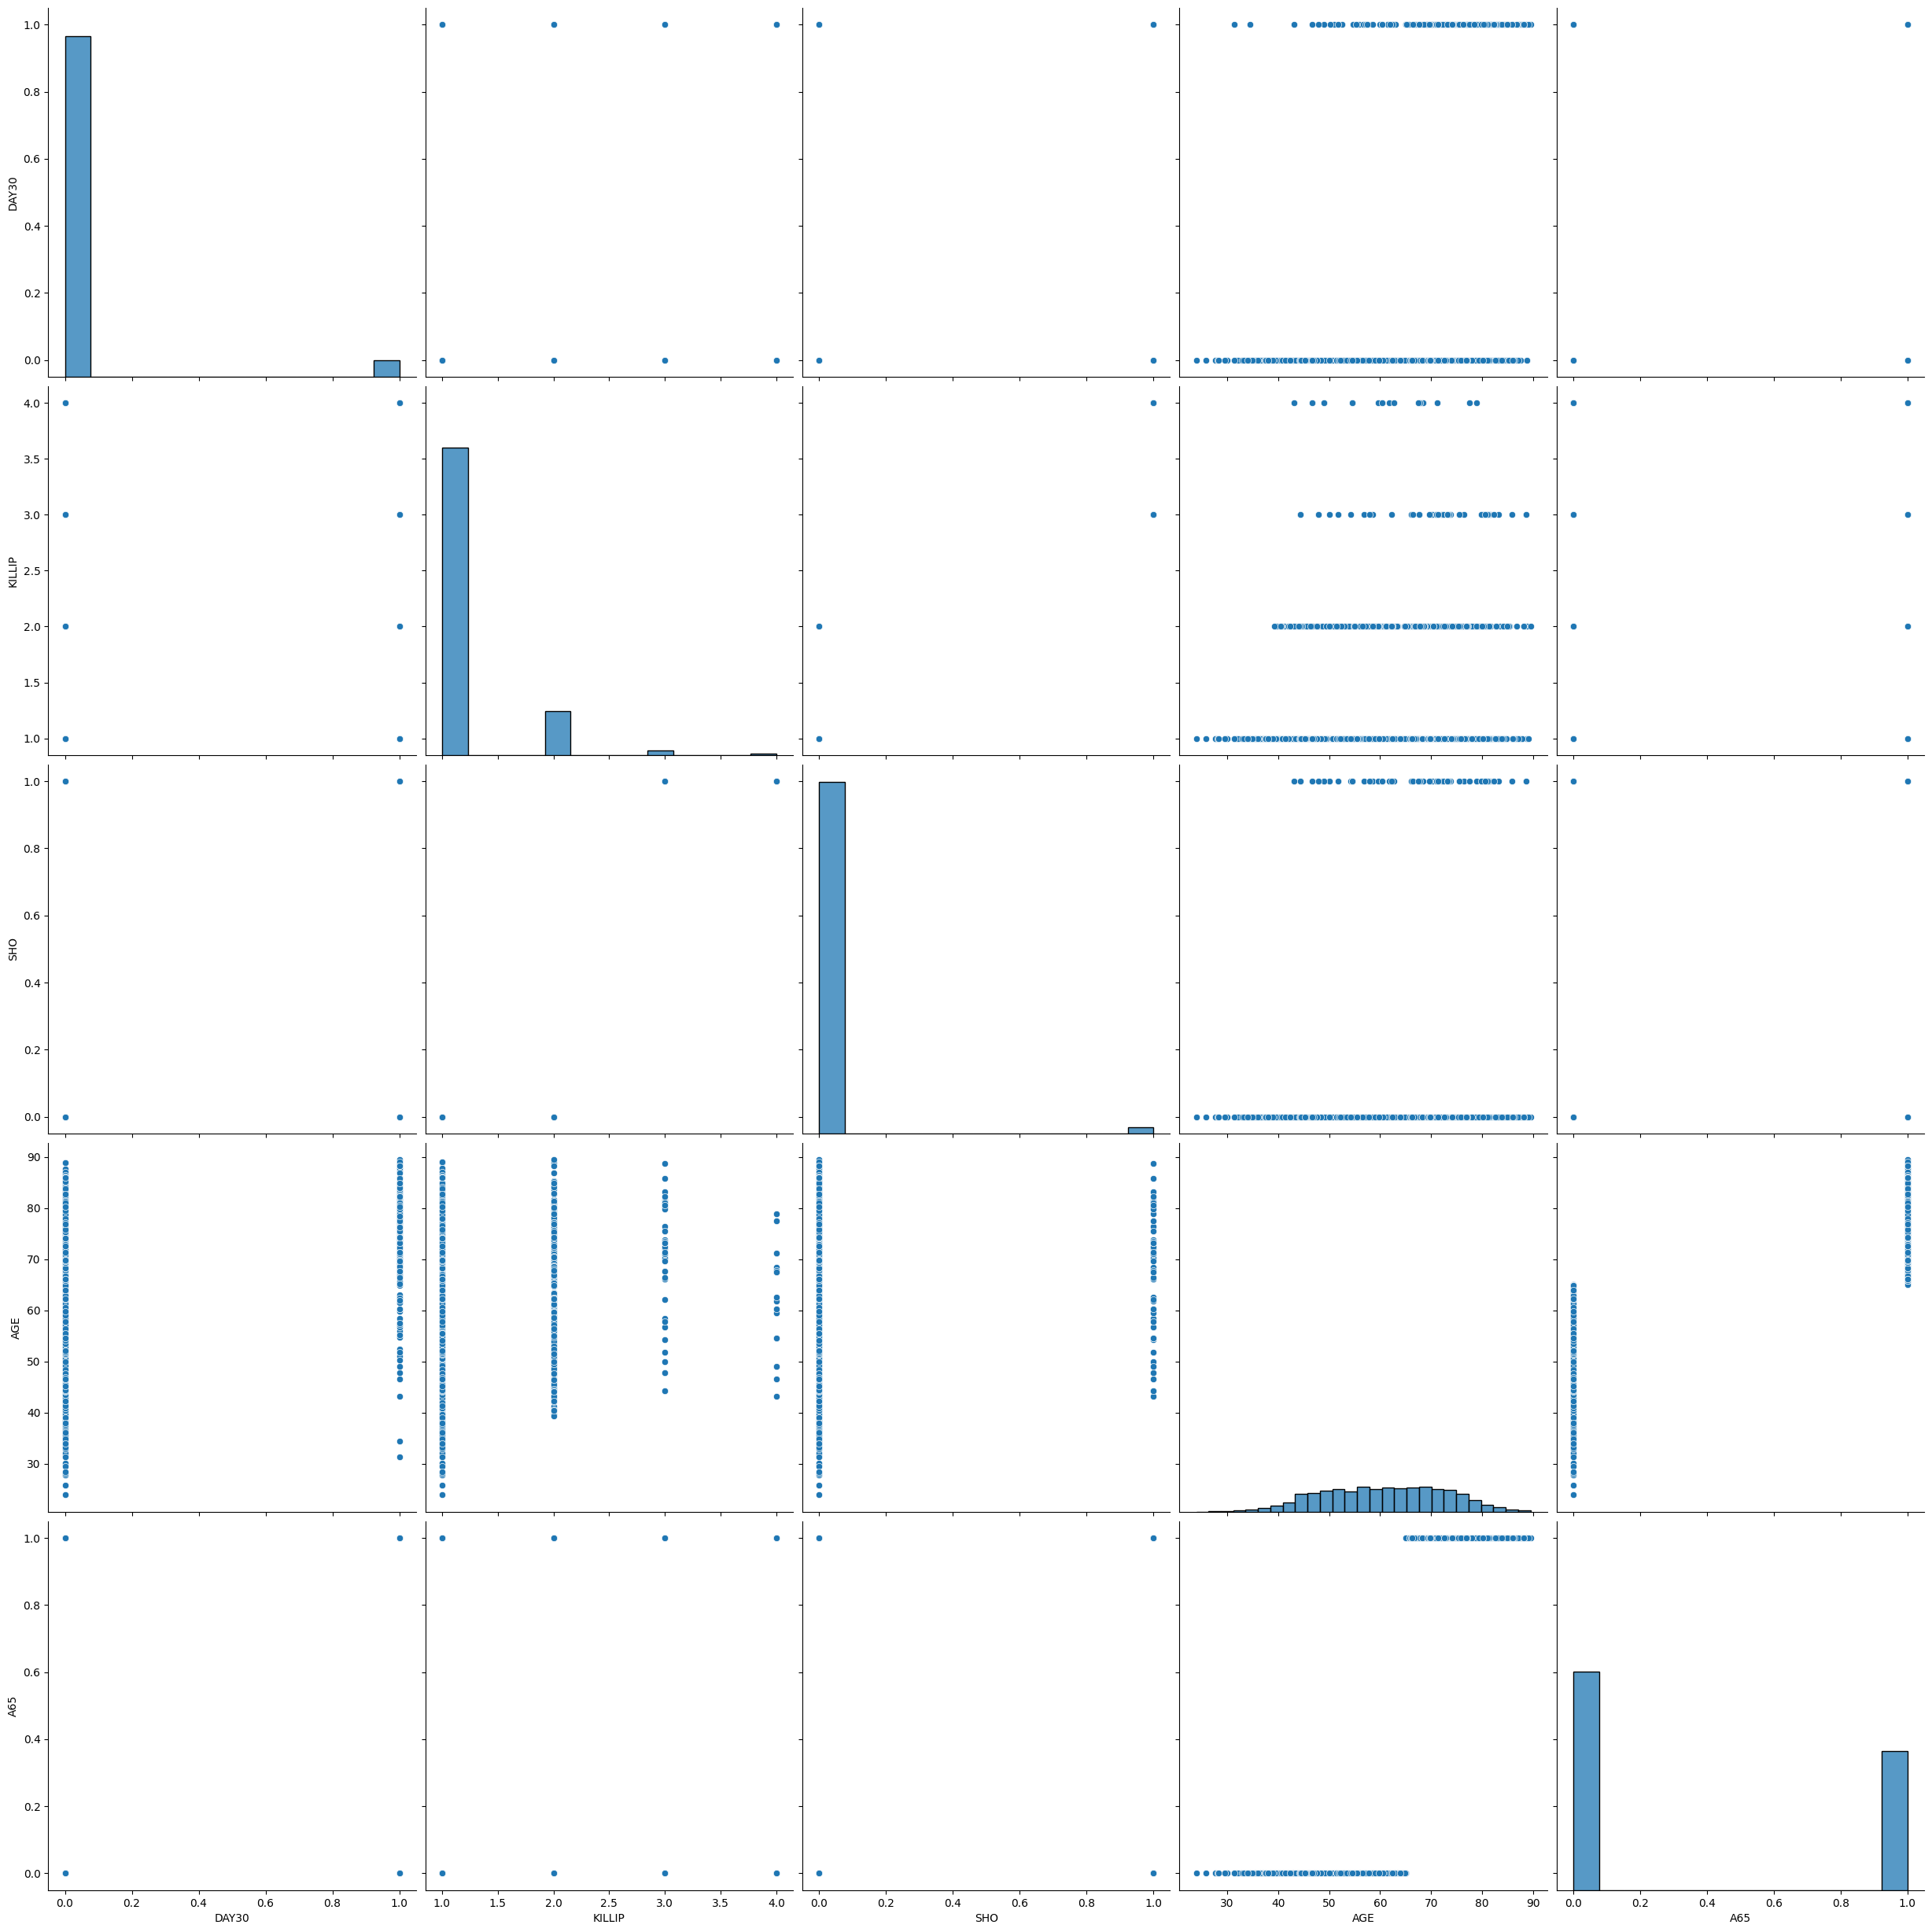

In [ ]:
cols = ['DAY30','KILLIP','SHO','AGE','A65']
sns.pairplot(training_df[cols], height=5)
plt.show()

In [ ]:
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# stratified_split.split funksiyasi indekslar qaytaradi
for train_index, test_index in stratified_split.split(training_df,training_df['SEX']):
    strat_train_set = training_df.loc[train_index]
    strat_test_set = training_df.loc[test_index]

In [ ]:
strat_train_set.head()

,DAY30,SEX,AGE,A65,KILLIP,SHO,DIA,HYP,HRT,ANT,...,HEI,WEI,HTN,SMK,LIP,PAN,FAM,STE,ST4,TTR
3165,0,0,70.969,1,2,0,0,0,1,0,...,167.0,88.2,1,3,0,0,0,6,1,1
2511,0,0,57.109,0,1,0,0,0,0,1,...,185.0,83.0,0,1,0,0,0,5,1,0
2964,0,1,78.500,1,1,0,1,1,1,0,...,150.8,60.0,1,3,0,0,0,4,0,0
2478,0,0,47.625,0,1,0,0,0,0,0,...,160.0,75.0,0,1,0,0,0,3,0,0
1897,0,0,46.992,0,1,0,0,0,0,0,...,180.3,89.0,0,1,1,1,0,3,0,1


In [ ]:
strat_test_set.head()

,DAY30,SEX,AGE,A65,KILLIP,SHO,DIA,HYP,HRT,ANT,...,HEI,WEI,HTN,SMK,LIP,PAN,FAM,STE,ST4,TTR
2370,0,1,78.609,1,2,0,0,0,0,1,...,163.0,60.0,0,3,1,0,1,4,0,1
1527,0,0,59.125,0,1,0,1,0,1,0,...,170.0,107.0,0,3,0,1,0,5,1,1
2663,0,0,56.289,0,1,0,0,0,0,0,...,164.0,85.0,0,3,1,1,0,4,0,0
1790,0,0,56.492,0,1,0,1,0,0,1,...,170.0,99.0,0,3,0,0,0,7,1,1
3379,0,0,75.797,1,1,0,0,0,0,0,...,176.0,72.3,0,2,1,0,0,5,1,1


In [ ]:
x_test = strat_test_set.drop("DAY30", axis=1)
y_test = strat_test_set["DAY30"].copy()

In [ ]:
x_test

,SEX,AGE,A65,KILLIP,SHO,DIA,HYP,HRT,ANT,PMI,HEI,WEI,HTN,SMK,LIP,PAN,FAM,STE,ST4,TTR
2370,1,78.609,1,2,0,0,0,0,1,0,163.0,60.0,0,3,1,0,1,4,0,1
1527,0,59.125,0,1,0,1,0,1,0,1,170.0,107.0,0,3,0,1,0,5,1,1
2663,0,56.289,0,1,0,0,0,0,0,0,164.0,85.0,0,3,1,1,0,4,0,0
1790,0,56.492,0,1,0,1,0,0,1,0,170.0,99.0,0,3,0,0,0,7,1,1
3379,0,75.797,1,1,0,0,0,0,0,0,176.0,72.3,0,2,1,0,0,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,0,59.133,0,1,0,0,0,0,0,1,177.0,60.0,0,2,1,1,1,3,0,1
1129,0,65.828,1,1,0,1,0,0,0,1,180.3,80.4,1,1,0,0,1,2,0,1
1017,0,74.453,1,1,0,0,0,0,0,1,173.0,78.6,1,3,1,0,1,8,1,1
561,0,54.758,0,2,0,0,0,0,0,0,183.0,94.4,0,1,0,0,1,4,0,0


In [ ]:
y_test

2370    0
1527    0
2663    0
1790    0
3379    0
       ..
3254    0
1129    0
1017    0
561     0
1225    0
Name: DAY30, Length: 681, dtype: int64

In [ ]:
x_train = strat_train_set.drop("DAY30", axis=1)
y_train = strat_train_set["DAY30"].copy()

In [ ]:
x_train

,SEX,AGE,A65,KILLIP,SHO,DIA,HYP,HRT,ANT,PMI,HEI,WEI,HTN,SMK,LIP,PAN,FAM,STE,ST4,TTR
3165,0,70.969,1,2,0,0,0,1,0,0,167.0,88.2,1,3,0,0,0,6,1,1
2511,0,57.109,0,1,0,0,0,0,1,0,185.0,83.0,0,1,0,0,0,5,1,0
2964,1,78.500,1,1,0,1,1,1,0,0,150.8,60.0,1,3,0,0,0,4,0,0
2478,0,47.625,0,1,0,0,0,0,0,1,160.0,75.0,0,1,0,0,0,3,0,0
1897,0,46.992,0,1,0,0,0,0,0,1,180.3,89.0,0,1,1,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,0,72.063,1,1,0,0,0,0,0,0,167.6,76.0,0,3,0,0,0,2,0,0
294,0,57.344,0,1,0,0,0,0,1,0,167.6,86.0,0,3,0,0,0,3,0,1
1693,1,58.563,0,1,0,0,0,0,0,0,175.0,77.3,1,3,1,1,1,5,1,1
1598,0,60.938,0,1,0,0,1,0,0,1,170.0,63.0,1,1,0,1,1,3,0,0


In [ ]:
y_train

3165    0
2511    0
2964    0
2478    0
1897    0
       ..
2135    0
294     0
1693    0
1598    0
2710    0
Name: DAY30, Length: 2721, dtype: int64

***Logistic Regression***

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Make predictions on the test data
y_pred_logistic = model.predict(x_test)
# y_prob = model.predict_proba(x_test)[:, 1]  # Probability estimates for the positive class


In [ ]:
strat_test_set['DAY30_PRED'] = y_pred_logistic
# strat_test_set['DAY30_PROB'] = y_prob
strat_test_set.head()

,DAY30,SEX,AGE,A65,KILLIP,SHO,DIA,HYP,HRT,ANT,...,WEI,HTN,SMK,LIP,PAN,FAM,STE,ST4,TTR,DAY30_PRED
2370,0,1,78.609,1,2,0,0,0,0,1,...,60.0,0,3,1,0,1,4,0,1,0
1527,0,0,59.125,0,1,0,1,0,1,0,...,107.0,0,3,0,1,0,5,1,1,0
2663,0,0,56.289,0,1,0,0,0,0,0,...,85.0,0,3,1,1,0,4,0,0,0
1790,0,0,56.492,0,1,0,1,0,0,1,...,99.0,0,3,0,0,0,7,1,1,0
3379,0,0,75.797,1,1,0,0,0,0,0,...,72.3,0,2,1,0,0,5,1,1,0


# Jaccard index baxolash

In [ ]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_pred_logistic)

0.14705882352941177

  # Chalkashlik matritsasi ma'lumotlariga asoslangan ko'rsatkichlar. Metrics based on Confusion Matrix Data. (Logistic regressiya)

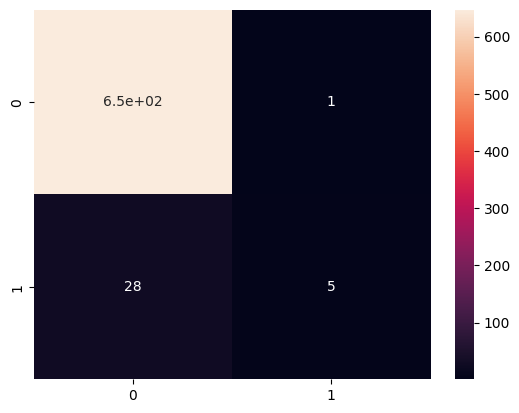

[[647   1]
 [ 28   5]]


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred_logistic), annot=True)
plt.show()
print(confusion_matrix(y_test, y_pred_logistic))

In [ ]:
accuracy = accuracy_score(y_test, y_pred_logistic)
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
class_report = classification_report(y_test, y_pred_logistic)

print(accuracy)
print(conf_matrix)
print(class_report)

0.9574155653450808
[[647   1]
 [ 28   5]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       648
           1       0.83      0.15      0.26        33

    accuracy                           0.96       681
   macro avg       0.90      0.57      0.62       681
weighted avg       0.95      0.96      0.94       681



***RandomForest***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
RF_model = RandomForestClassifier()
RF_model.fit(x_train, y_train)
y_predicted_random_forest = RF_model.predict(x_test)

# Chalkashlik matritsasi ma'lumotlariga asoslangan ko'rsatkichlar. Metrics based on Confusion Matrix Data. (RandomForestClassifier)

In [ ]:
class_report = classification_report(y_test, y_predicted_random_forest)
jaccard = jaccard_score(y_test, y_predicted_random_forest)

print(class_report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       648
           1       1.00      0.15      0.26        33

    accuracy                           0.96       681
   macro avg       0.98      0.58      0.62       681
weighted avg       0.96      0.96      0.94       681



***DecisionTree***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
Tree_model = DecisionTreeClassifier()
Tree_model.fit(x_train, y_train)
y_predicted_decision_tree = Tree_model.predict(x_test)

# Chalkashlik matritsasi ma'lumotlariga asoslangan ko'rsatkichlar. Metrics based on Confusion Matrix Data. (Decision Tree classifier)

In [ ]:
class_report = classification_report(y_test, y_predicted_decision_tree)
print(class_report)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       648
           1       0.25      0.18      0.21        33

    accuracy                           0.93       681
   macro avg       0.60      0.58      0.59       681
weighted avg       0.92      0.93      0.93       681



***KNN***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5) # k-ni qiymati

knn.fit(x_train, y_train)
y_predict_knn = knn.predict(x_test)

# Chalkashlik matritsasi ma'lumotlariga asoslangan ko'rsatkichlar. Metrics based on Confusion Matrix Data. (KNN classifier)

In [ ]:
class_report = classification_report(y_test, y_predict_knn)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       648
           1       0.00      0.00      0.00        33

    accuracy                           0.95       681
   macro avg       0.48      0.50      0.49       681
weighted avg       0.91      0.95      0.93       681





```
# This is formatted as code
```

***Cross-validation logistic regression***

In [ ]:
from sklearn.model_selection import cross_val_predict
predict_logistic = cross_val_predict(estimator=model, X=x_train, y=y_train, cv=5)
# print(y_test)
# print(predict_logistic)
print("Classification Report: \n",classification_report(y_train, predict_logistic))

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      2594
           1       0.72      0.22      0.34       127

    accuracy                           0.96      2721
   macro avg       0.84      0.61      0.66      2721
weighted avg       0.95      0.96      0.95      2721



**Random Forest with cross validation**

In [ ]:
from sklearn.model_selection import cross_val_predict
predict_random_forest = cross_val_predict(estimator=RF_model, X=x_train, y=y_train, cv=5)
print("Classification Report: \n",classification_report(y_train, predict_random_forest))

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      2594
           1       0.39      0.13      0.20       127

    accuracy                           0.95      2721
   macro avg       0.67      0.56      0.59      2721
weighted avg       0.93      0.95      0.94      2721



**Decision Tree with cross validation**

In [ ]:
from sklearn.model_selection import cross_val_predict
predict_decision_tree = cross_val_predict(estimator=Tree_model, X=x_train, y=y_train, cv=5)
print("Classification Report: \n",classification_report(y_train, predict_decision_tree))

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      2594
           1       0.19      0.21      0.20       127

    accuracy                           0.92      2721
   macro avg       0.58      0.58      0.58      2721
weighted avg       0.93      0.92      0.92      2721



**KNN with cross validation**

In [ ]:
from sklearn.model_selection import cross_val_predict
predict_knn = cross_val_predict(estimator=knn, X=x_train, y=y_train, cv=5)
print("Classification Report: \n",classification_report(y_train, predict_knn))

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      2594
           1       0.20      0.01      0.02       127

    accuracy                           0.95      2721
   macro avg       0.58      0.50      0.50      2721
weighted avg       0.92      0.95      0.93      2721



**Modelni saqlash (pickle yordamida saqlash)**

In [ ]:
import pickle

filename = 'Logistic_model.pkl' # faylga istalgan nom beramiz
with open(filename, 'wb') as file:
    pickle.dump(model, file)

In [ ]:
with open(filename, 'rb') as file:
    logictic_model = pickle.load(file)

In [ ]:
from sklearn.model_selection import cross_val_predict
predict_knn = cross_val_predict(estimator=logictic_model, X=x_train, y=y_train, cv=5)
print("Classification Report: \n",classification_report(y_train, predict_knn))

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      2594
           1       0.72      0.22      0.34       127

    accuracy                           0.96      2721
   macro avg       0.84      0.61      0.66      2721
weighted avg       0.95      0.96      0.95      2721



**Eng yaxshi K ni topish**

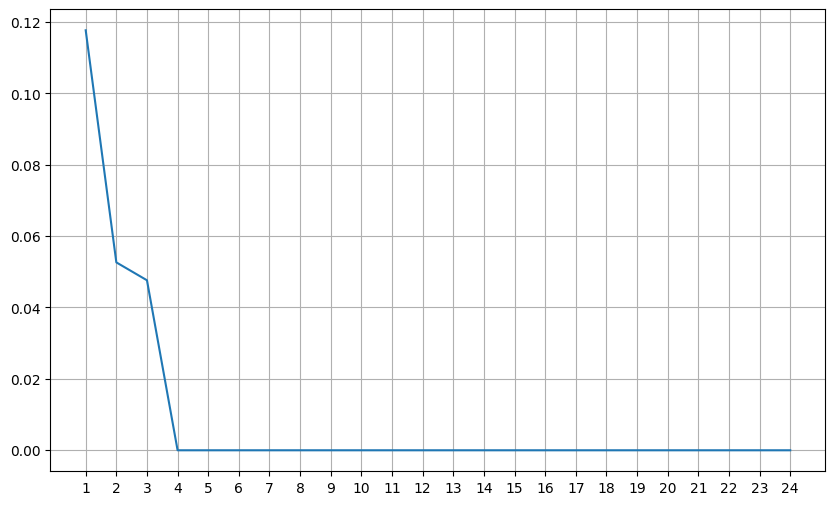

In [ ]:
from sklearn.metrics import  f1_score
f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k) # k-ni qiymati
    knn.fit(x_train, y_train)
    y_predict = knn.predict(x_test)
    f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

**Grid Search yordamida**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
knn_gscv.cv_results_['rank_test_score']

array([24, 22, 23, 20, 20, 15, 19,  1, 16,  1, 16,  1, 18,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1], dtype=int32)

In [ ]:
knn_gscv.best_params_

{'n_neighbors': 8}

In [ ]:
knn_gscv.best_score_

0.9533263626551538

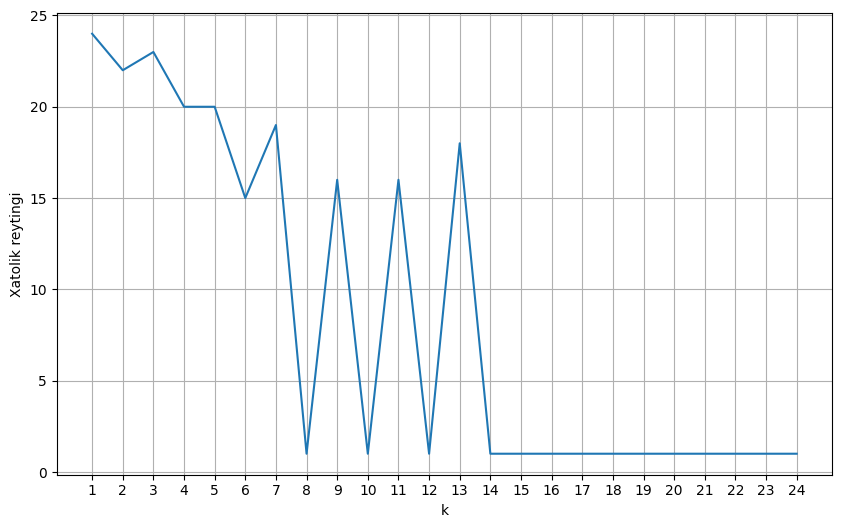

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()

***Deep learning method***

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print(x_train[0])
print(x_test[0])

[-0.5823013   0.87136208  1.26054071  1.8898131  -0.13820681 -0.39422584
 -0.31031164  1.44396469 -0.77497628 -0.45282305 -0.434309    0.4094603
  1.24985875  1.37102799 -0.8013266  -0.72649389 -0.91706126  1.01830297
  1.28935124  0.83830391]
[ 1.71732401  1.51636285  1.26054071  1.8898131  -0.13820681 -0.39422584
 -0.31031164 -0.69253771  1.29036207 -0.45282305 -0.83212587 -1.21272399
 -0.80009041  1.37102799  1.24793062 -0.72649389  1.0904397  -0.04862132
 -0.77558385  0.83830391]


In [ ]:
dl_model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
dl_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
dl_model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
68/68 [==============================] - 3s 8ms/step - loss: 0.2898 - accuracy: 0.9347 - val_loss: 0.1592 - val_accuracy: 0.9596
Epoch 2/50
68/68 [==============================] - 0s 4ms/step - loss: 0.1554 - accuracy: 0.9513 - val_loss: 0.1470 - val_accuracy: 0.9596
Epoch 3/50
68/68 [==============================] - 0s 4ms/step - loss: 0.1406 - accuracy: 0.9559 - val_loss: 0.1459 - val_accuracy: 0.9578
Epoch 4/50
68/68 [==============================] - 0s 4ms/step - loss: 0.1344 - accuracy: 0.9573 - val_loss: 0.1451 - val_accuracy: 0.9578
Epoch 5/50
68/68 [==============================] - 0s 4ms/step - loss: 0.1297 - accuracy: 0.9582 - val_loss: 0.1460 - val_accuracy: 0.9596
Epoch 6/50
68/68 [==============================] - 0s 3ms/step - loss: 0.1255 - accuracy: 0.9591 - val_loss: 0.1473 - val_accuracy: 0.9615
Epoch 7/50
68/68 [==============================] - 0s 3ms/step - loss: 0.1223 - accuracy: 0.9596 - val_loss: 0.1481 - val_accuracy: 0.9596
Epoch 8/50
68/68 [==

In [ ]:
loss, accuracy = dl_model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

22/22 [==============================] - 0s 6ms/step - loss: 0.2158 - accuracy: 0.9515
Test Accuracy: 0.9515


Optimize deep learning model

In [ ]:
optimized_dl_model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
optimized_dl_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and reducing learning rate on plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
history = optimized_dl_model.fit(x_train, y_train, epochs=100, batch_size=64, validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr], verbose=1)


Epoch 1/100
34/34 [==============================] - 3s 21ms/step - loss: 0.1635 - accuracy: 0.9531 - val_loss: 0.1445 - val_accuracy: 0.9578 - lr: 0.0010
Epoch 2/100
34/34 [==============================] - 0s 10ms/step - loss: 0.1509 - accuracy: 0.9563 - val_loss: 0.1431 - val_accuracy: 0.9578 - lr: 0.0010
Epoch 3/100
34/34 [==============================] - 0s 12ms/step - loss: 0.1485 - accuracy: 0.9563 - val_loss: 0.1425 - val_accuracy: 0.9596 - lr: 0.0010
Epoch 4/100
34/34 [==============================] - 0s 10ms/step - loss: 0.1422 - accuracy: 0.9582 - val_loss: 0.1437 - val_accuracy: 0.9615 - lr: 0.0010
Epoch 5/100
34/34 [==============================] - 0s 9ms/step - loss: 0.1376 - accuracy: 0.9531 - val_loss: 0.1446 - val_accuracy: 0.9578 - lr: 0.0010
Epoch 6/100
34/34 [==============================] - 0s 10ms/step - loss: 0.1445 - accuracy: 0.9545 - val_loss: 0.1438 - val_accuracy: 0.9596 - lr: 0.0010
Epoch 7/100
34/34 [==============================] - 0s 11ms/step - los

In [ ]:
# Evaluate the model
loss, accuracy = optimized_dl_model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Make predictions
y_pred = (optimized_dl_model.predict(x_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.4f}')

22/22 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9515
Test Accuracy: 0.9515
22/22 [==============================] - 0s 2ms/step
Model Accuracy: 0.9515


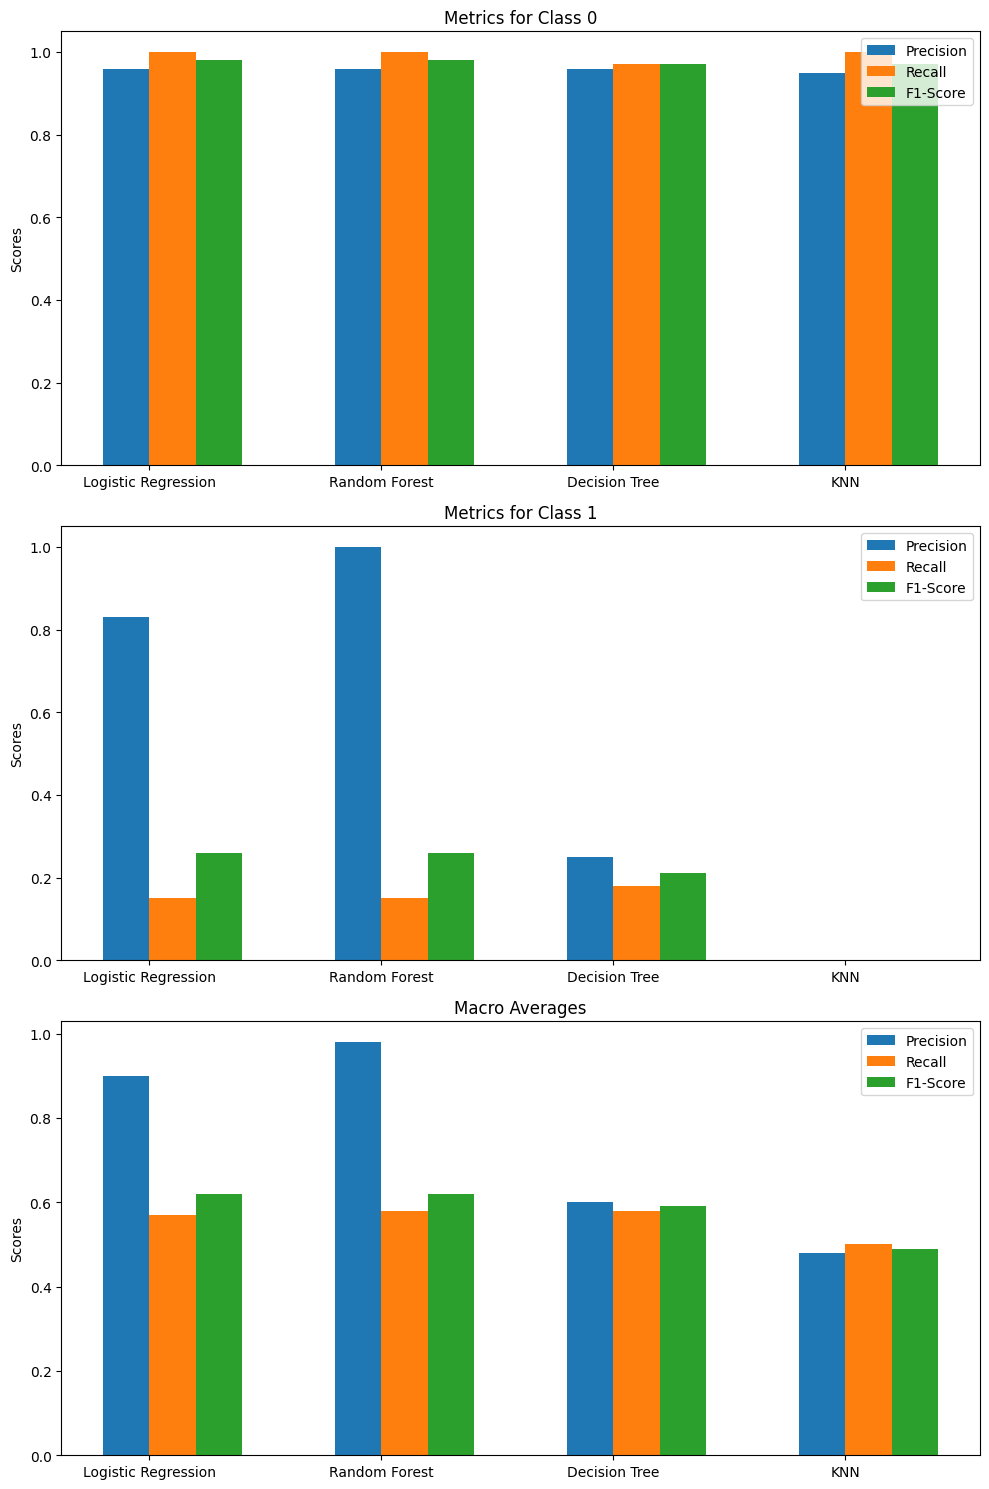

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'KNN']
precision_0 = [0.96, 0.96, 0.96, 0.95]
recall_0 = [1.00, 1.00, 0.97, 1.00]
f1_0 = [0.98, 0.98, 0.97, 0.97]

precision_1 = [0.83, 1.00, 0.25, 0.00]
recall_1 = [0.15, 0.15, 0.18, 0.00]
f1_1 = [0.26, 0.26, 0.21, 0.00]

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Plotting for Class 0
rects1 = ax[0].bar(x - width/2, precision_0, width, label='Precision')
rects2 = ax[0].bar(x + width/2, recall_0, width, label='Recall')
rects3 = ax[0].bar(x + 1.5 * width, f1_0, width, label='F1-Score')

ax[0].set_ylabel('Scores')
ax[0].set_title('Metrics for Class 0')
ax[0].set_xticks(x)
ax[0].set_xticklabels(models)
ax[0].legend()

# Plotting for Class 1
rects1 = ax[1].bar(x - width/2, precision_1, width, label='Precision')
rects2 = ax[1].bar(x + width/2, recall_1, width, label='Recall')
rects3 = ax[1].bar(x + 1.5 * width, f1_1, width, label='F1-Score')

ax[1].set_ylabel('Scores')
ax[1].set_title('Metrics for Class 1')
ax[1].set_xticks(x)
ax[1].set_xticklabels(models)
ax[1].legend()

# Plotting for Macro Averages
macro_precision = [0.90, 0.98, 0.60, 0.48]
macro_recall = [0.57, 0.58, 0.58, 0.50]
macro_f1 = [0.62, 0.62, 0.59, 0.49]

rects1 = ax[2].bar(x - width/2, macro_precision, width, label='Precision')
rects2 = ax[2].bar(x + width/2, macro_recall, width, label='Recall')
rects3 = ax[2].bar(x + 1.5 * width, macro_f1, width, label='F1-Score')

ax[2].set_ylabel('Scores')
ax[2].set_title('Macro Averages')
ax[2].set_xticks(x)
ax[2].set_xticklabels(models)
ax[2].legend()

fig.tight_layout()
plt.show()


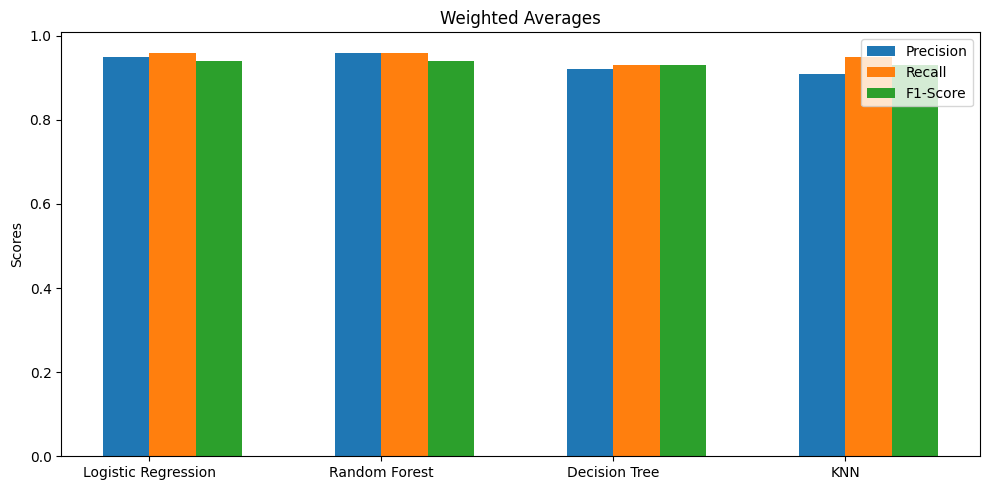

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

weighted_precision = [0.95, 0.96, 0.92, 0.91]
weighted_recall = [0.96, 0.96, 0.93, 0.95]
weighted_f1 = [0.94, 0.94, 0.93, 0.93]

rects1 = ax.bar(x - width/2, weighted_precision, width, label='Precision')
rects2 = ax.bar(x + width/2, weighted_recall, width, label='Recall')
rects3 = ax.bar(x + 1.5 * width, weighted_f1, width, label='F1-Score')

ax.set_ylabel('Scores')
ax.set_title('Weighted Averages')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()
plt.show()


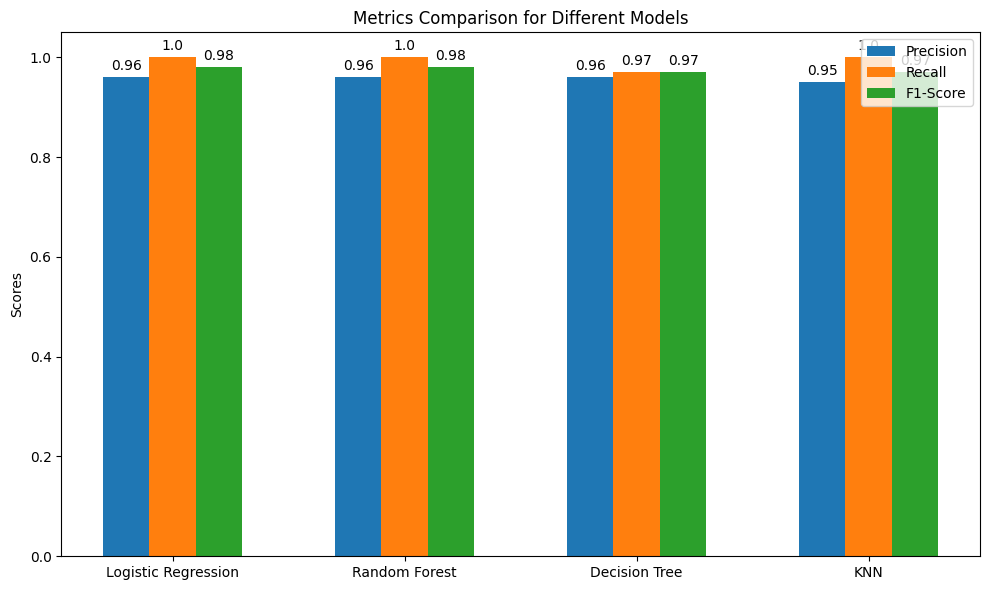

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'KNN']
metrics = ['Precision', 'Recall', 'F1-Score']

# Values for each metric
precision = [0.96, 0.96, 0.96, 0.95]
recall = [1.00, 1.00, 0.97, 1.00]
f1_score = [0.98, 0.98, 0.97, 0.97]

# Grouped values for easier plotting
values = [precision, recall, f1_score]

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bars
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Adding labels, title, and legend
ax.set_ylabel('Scores')
ax.set_title('Metrics Comparison for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Adding value labels on bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

fig.tight_layout()
plt.show()


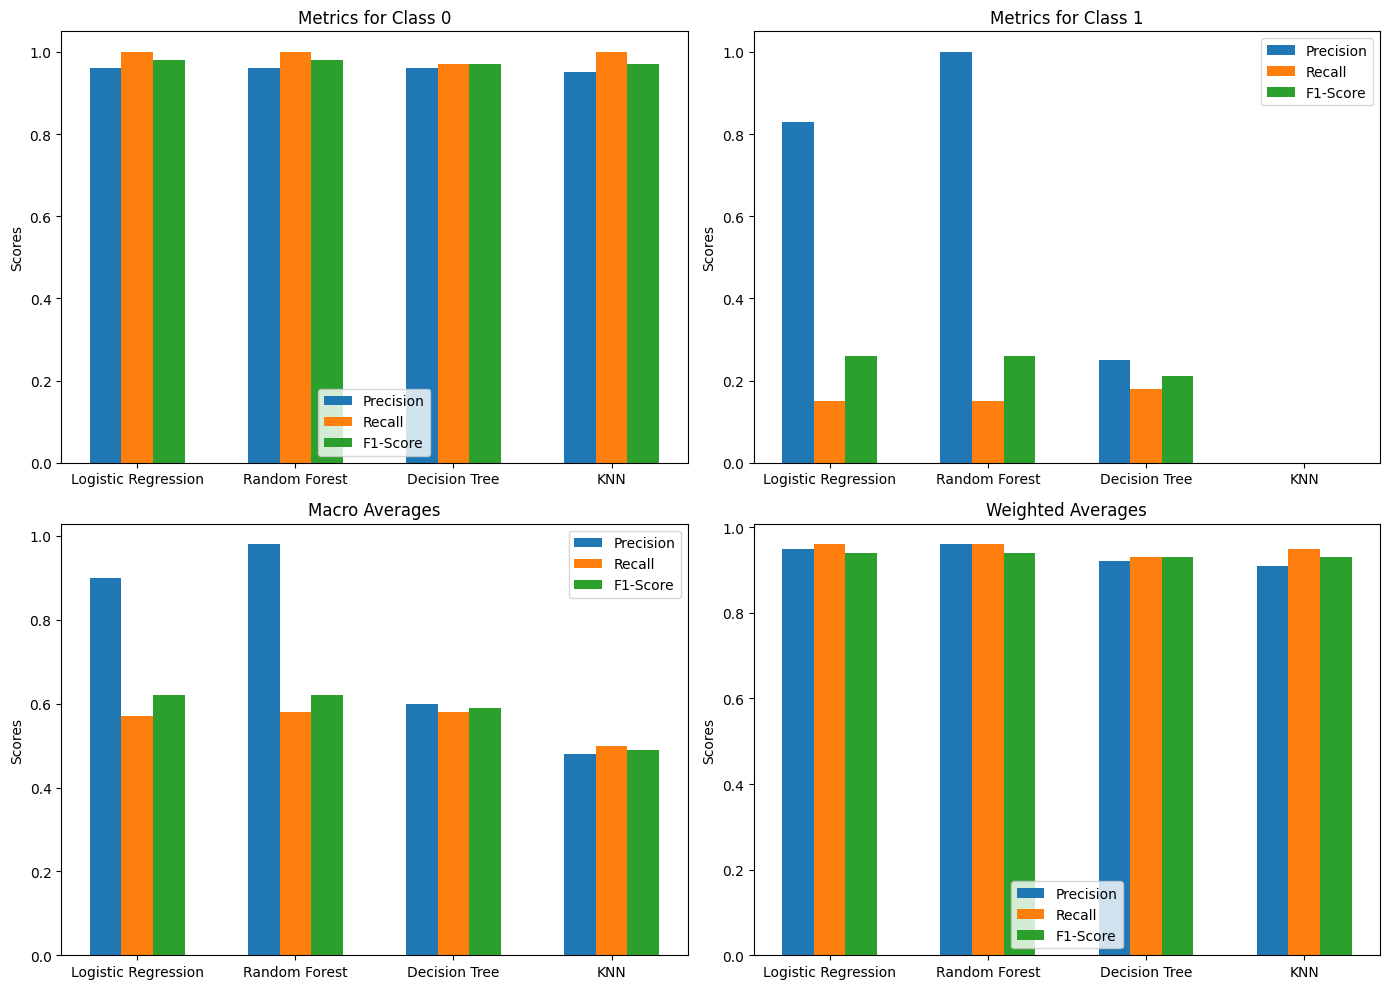

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'KNN']
precision_0 = [0.96, 0.96, 0.96, 0.95]
recall_0 = [1.00, 1.00, 0.97, 1.00]
f1_0 = [0.98, 0.98, 0.97, 0.97]

precision_1 = [0.83, 1.00, 0.25, 0.00]
recall_1 = [0.15, 0.15, 0.18, 0.00]
f1_1 = [0.26, 0.26, 0.21, 0.00]

macro_precision = [0.90, 0.98, 0.60, 0.48]
macro_recall = [0.57, 0.58, 0.58, 0.50]
macro_f1 = [0.62, 0.62, 0.59, 0.49]

weighted_precision = [0.95, 0.96, 0.92, 0.91]
weighted_recall = [0.96, 0.96, 0.93, 0.95]
weighted_f1 = [0.94, 0.94, 0.93, 0.93]

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Plotting for Class 0
rects1 = ax[0, 0].bar(x - width, precision_0, width, label='Precision')
rects2 = ax[0, 0].bar(x, recall_0, width, label='Recall')
rects3 = ax[0, 0].bar(x + width, f1_0, width, label='F1-Score')

ax[0, 0].set_ylabel('Scores')
ax[0, 0].set_title('Metrics for Class 0')
ax[0, 0].set_xticks(x)
ax[0, 0].set_xticklabels(models)
ax[0, 0].legend()

# Plotting for Class 1
rects1 = ax[0, 1].bar(x - width, precision_1, width, label='Precision')
rects2 = ax[0, 1].bar(x, recall_1, width, label='Recall')
rects3 = ax[0, 1].bar(x + width, f1_1, width, label='F1-Score')

ax[0, 1].set_ylabel('Scores')
ax[0, 1].set_title('Metrics for Class 1')
ax[0, 1].set_xticks(x)
ax[0, 1].set_xticklabels(models)
ax[0, 1].legend()

# Plotting for Macro Averages
rects1 = ax[1, 0].bar(x - width, macro_precision, width, label='Precision')
rects2 = ax[1, 0].bar(x, macro_recall, width, label='Recall')
rects3 = ax[1, 0].bar(x + width, macro_f1, width, label='F1-Score')

ax[1, 0].set_ylabel('Scores')
ax[1, 0].set_title('Macro Averages')
ax[1, 0].set_xticks(x)
ax[1, 0].set_xticklabels(models)
ax[1, 0].legend()

# Plotting for Weighted Averages
rects1 = ax[1, 1].bar(x - width, weighted_precision, width, label='Precision')
rects2 = ax[1, 1].bar(x, weighted_recall, width, label='Recall')
rects3 = ax[1, 1].bar(x + width, weighted_f1, width, label='F1-Score')

ax[1, 1].set_ylabel('Scores')
ax[1, 1].set_title('Weighted Averages')
ax[1, 1].set_xticks(x)
ax[1, 1].set_xticklabels(models)
ax[1, 1].legend()

fig.tight_layout()
plt.show()


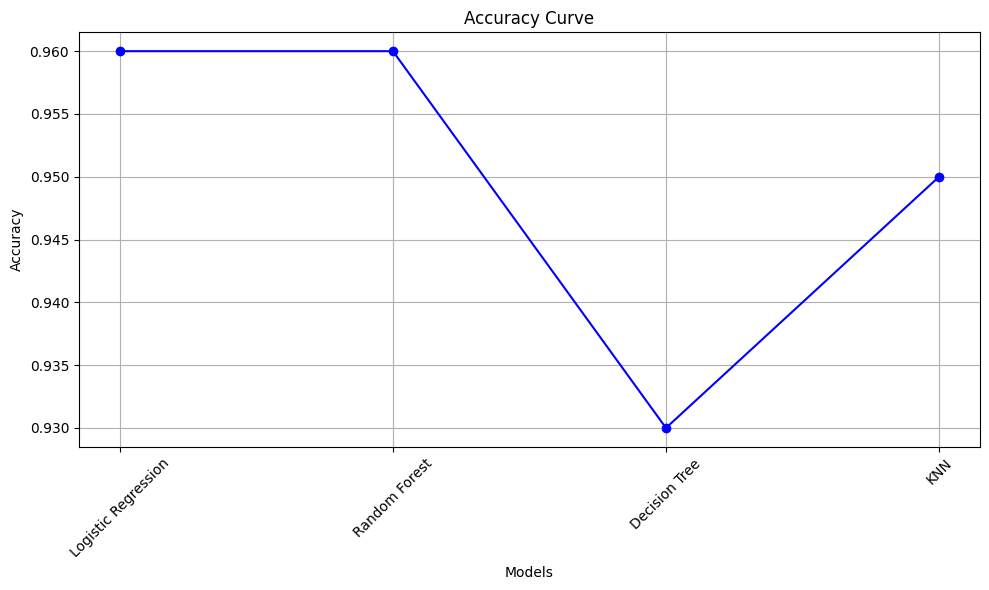

In [ ]:
import matplotlib.pyplot as plt

# Models and their accuracies
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'KNN']
accuracies = [0.96, 0.96, 0.93, 0.95]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(models, accuracies, marker='o', linestyle='-', color='b')

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Curve')
ax.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


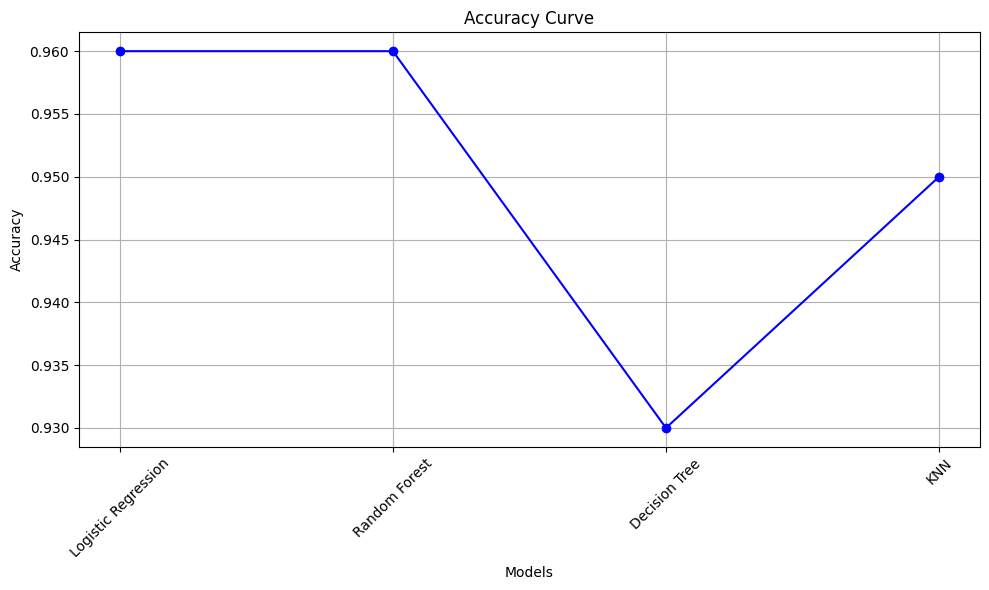

In [ ]:
# Models and their accuracies
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'KNN']
accuracies = [0.96, 0.96, 0.93, 0.95]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(models, accuracies, marker='o', linestyle='-', color='b')

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Curve')
ax.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


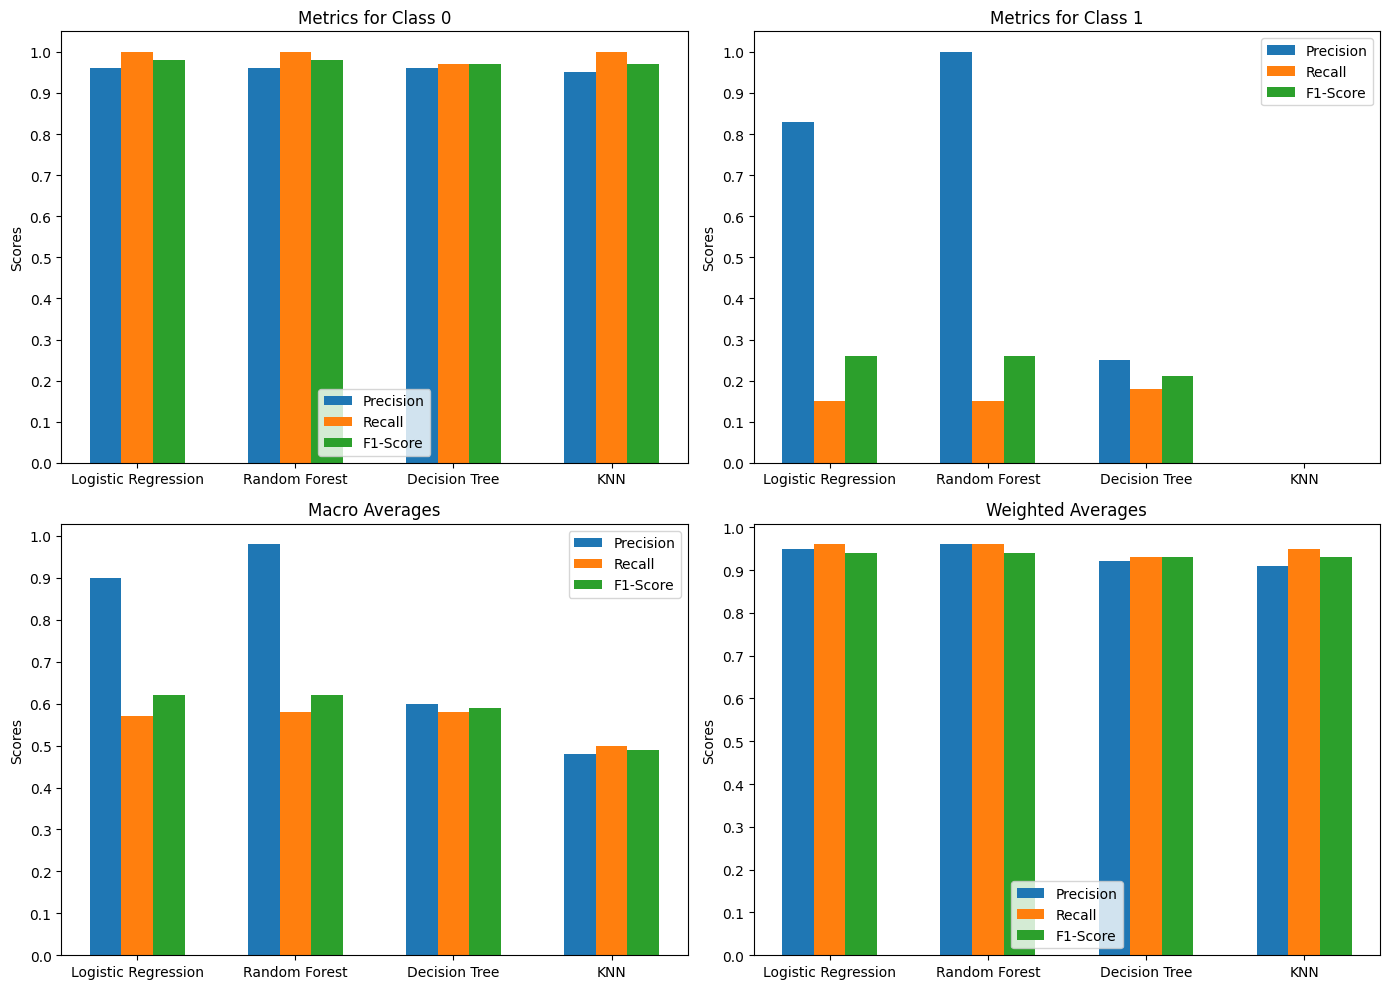

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'KNN']
precision_0 = [0.96, 0.96, 0.96, 0.95]
recall_0 = [1.00, 1.00, 0.97, 1.00]
f1_0 = [0.98, 0.98, 0.97, 0.97]

precision_1 = [0.83, 1.00, 0.25, 0.00]
recall_1 = [0.15, 0.15, 0.18, 0.00]
f1_1 = [0.26, 0.26, 0.21, 0.00]

macro_precision = [0.90, 0.98, 0.60, 0.48]
macro_recall = [0.57, 0.58, 0.58, 0.50]
macro_f1 = [0.62, 0.62, 0.59, 0.49]

weighted_precision = [0.95, 0.96, 0.92, 0.91]
weighted_recall = [0.96, 0.96, 0.93, 0.95]
weighted_f1 = [0.94, 0.94, 0.93, 0.93]

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Plotting for Class 0
rects1 = ax[0, 0].bar(x - width, precision_0, width, label='Precision')
rects2 = ax[0, 0].bar(x, recall_0, width, label='Recall')
rects3 = ax[0, 0].bar(x + width, f1_0, width, label='F1-Score')

ax[0, 0].set_ylabel('Scores')
ax[0, 0].set_title('Metrics for Class 0')
ax[0, 0].set_xticks(x)
ax[0, 0].set_xticklabels(models)
ax[0, 0].legend()
ax[0, 0].set_yticks(np.arange(0, 1.1, 0.1))  # Set y-ticks at intervals of 0.1

# Plotting for Class 1
rects1 = ax[0, 1].bar(x - width, precision_1, width, label='Precision')
rects2 = ax[0, 1].bar(x, recall_1, width, label='Recall')
rects3 = ax[0, 1].bar(x + width, f1_1, width, label='F1-Score')

ax[0, 1].set_ylabel('Scores')
ax[0, 1].set_title('Metrics for Class 1')
ax[0, 1].set_xticks(x)
ax[0, 1].set_xticklabels(models)
ax[0, 1].legend()
ax[0, 1].set_yticks(np.arange(0, 1.1, 0.1))  # Set y-ticks at intervals of 0.1

# Plotting for Macro Averages
rects1 = ax[1, 0].bar(x - width, macro_precision, width, label='Precision')
rects2 = ax[1, 0].bar(x, macro_recall, width, label='Recall')
rects3 = ax[1, 0].bar(x + width, macro_f1, width, label='F1-Score')

ax[1, 0].set_ylabel('Scores')
ax[1, 0].set_title('Macro Averages')
ax[1, 0].set_xticks(x)
ax[1, 0].set_xticklabels(models)
ax[1, 0].legend()
ax[1, 0].set_yticks(np.arange(0, 1.1, 0.1))  # Set y-ticks at intervals of 0.1

# Plotting for Weighted Averages
rects1 = ax[1, 1].bar(x - width, weighted_precision, width, label='Precision')
rects2 = ax[1, 1].bar(x, weighted_recall, width, label='Recall')
rects3 = ax[1, 1].bar(x + width, weighted_f1, width, label='F1-Score')

ax[1, 1].set_ylabel('Scores')
ax[1, 1].set_title('Weighted Averages')
ax[1, 1].set_xticks(x)
ax[1, 1].set_xticklabels(models)
ax[1, 1].legend()
ax[1, 1].set_yticks(np.arange(0, 1.1, 0.1))  # Set y-ticks at intervals of 0.1

fig.tight_layout()
plt.show()


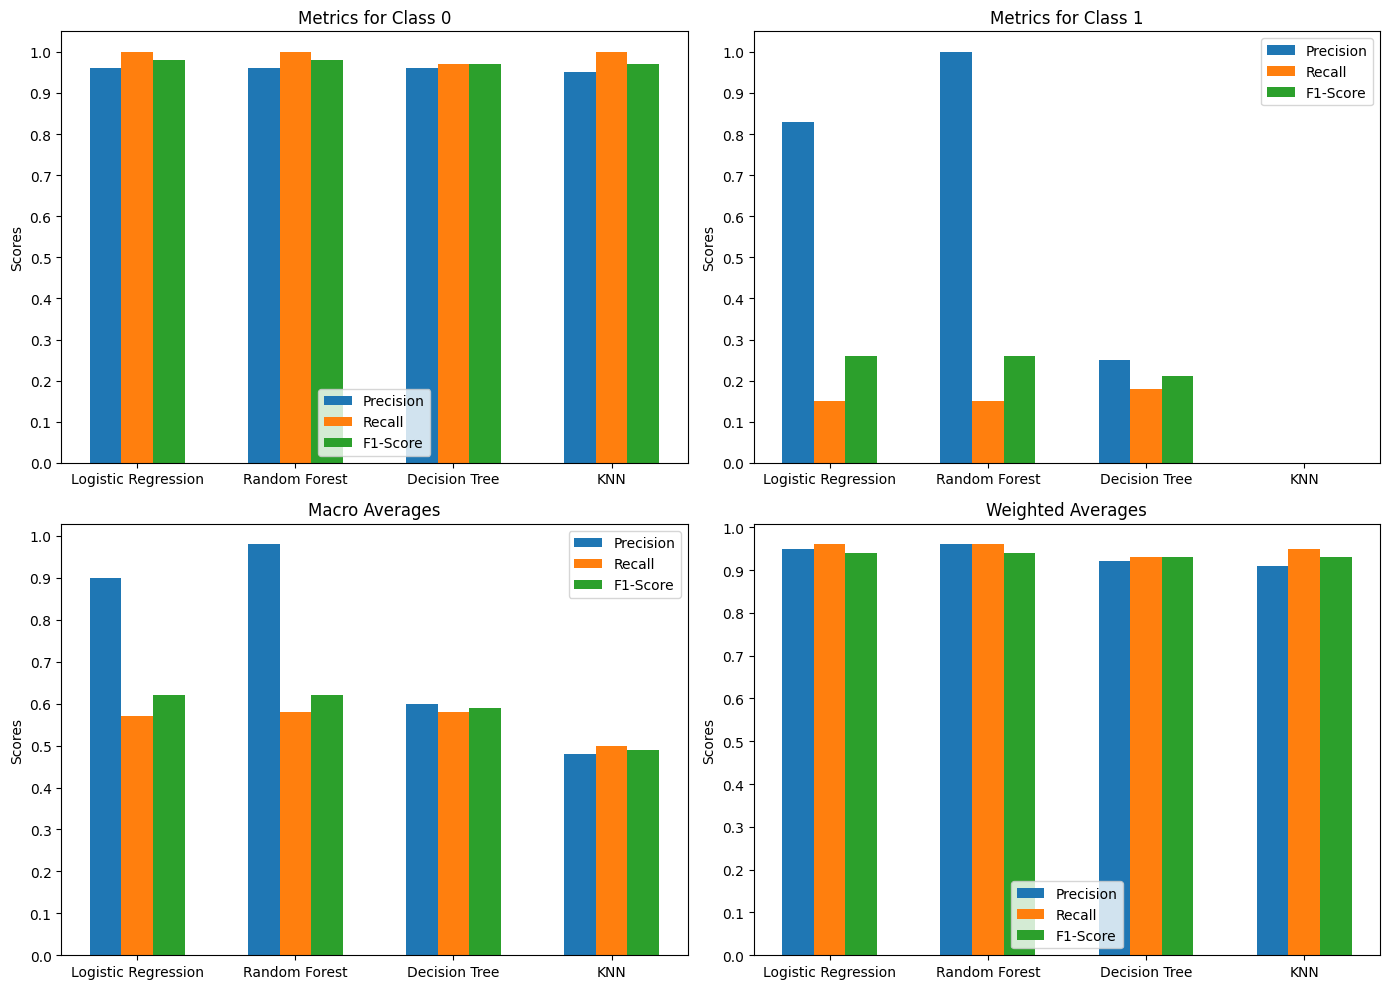

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'KNN']
precision_0 = [0.96, 0.96, 0.96, 0.95]
recall_0 = [1.00, 1.00, 0.97, 1.00]
f1_0 = [0.98, 0.98, 0.97, 0.97]

precision_1 = [0.83, 1.00, 0.25, 0.00]
recall_1 = [0.15, 0.15, 0.18, 0.00]
f1_1 = [0.26, 0.26, 0.21, 0.00]

macro_precision = [0.90, 0.98, 0.60, 0.48]
macro_recall = [0.57, 0.58, 0.58, 0.50]
macro_f1 = [0.62, 0.62, 0.59, 0.49]

weighted_precision = [0.95, 0.96, 0.92, 0.91]
weighted_recall = [0.96, 0.96, 0.93, 0.95]
weighted_f1 = [0.94, 0.94, 0.93, 0.93]

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Plotting for Class 0
rects1 = ax[0, 0].bar(x - width, precision_0, width, label='Precision')
rects2 = ax[0, 0].bar(x, recall_0, width, label='Recall')
rects3 = ax[0, 0].bar(x + width, f1_0, width, label='F1-Score')

ax[0, 0].set_ylabel('Scores')
ax[0, 0].set_title('Metrics for Class 0')
ax[0, 0].set_xticks(x)
ax[0, 0].set_xticklabels(models)
ax[0, 0].legend()
ax[0, 0].set_yticks(np.arange(0, 1.1, 0.1))  # Set y-ticks at intervals of 0.1

# Plotting for Class 1
rects1 = ax[0, 1].bar(x - width, precision_1, width, label='Precision')
rects2 = ax[0, 1].bar(x, recall_1, width, label='Recall')
rects3 = ax[0, 1].bar(x + width, f1_1, width, label='F1-Score')

ax[0, 1].set_ylabel('Scores')
ax[0, 1].set_title('Metrics for Class 1')
ax[0, 1].set_xticks(x)
ax[0, 1].set_xticklabels(models)
ax[0, 1].legend()
ax[0, 1].set_yticks(np.arange(0, 1.1, 0.1))  # Set y-ticks at intervals of 0.1

# Plotting for Macro Averages
rects1 = ax[1, 0].bar(x - width, macro_precision, width, label='Precision')
rects2 = ax[1, 0].bar(x, macro_recall, width, label='Recall')
rects3 = ax[1, 0].bar(x + width, macro_f1, width, label='F1-Score')

ax[1, 0].set_ylabel('Scores')
ax[1, 0].set_title('Macro Averages')
ax[1, 0].set_xticks(x)
ax[1, 0].set_xticklabels(models)
ax[1, 0].legend()
ax[1, 0].set_yticks(np.arange(0, 1.1, 0.1))  # Set y-ticks at intervals of 0.1

# Plotting for Weighted Averages
rects1 = ax[1, 1].bar(x - width, weighted_precision, width, label='Precision')
rects2 = ax[1, 1].bar(x, weighted_recall, width, label='Recall')
rects3 = ax[1, 1].bar(x + width, weighted_f1, width, label='F1-Score')

ax[1, 1].set_ylabel('Scores')
ax[1, 1].set_title('Weighted Averages')
ax[1, 1].set_xticks(x)
ax[1, 1].set_xticklabels(models)
ax[1, 1].legend()
ax[1, 1].set_yticks(np.arange(0, 1.1, 0.1))  # Set y-ticks at intervals of 0.1

fig.tight_layout()
plt.show()


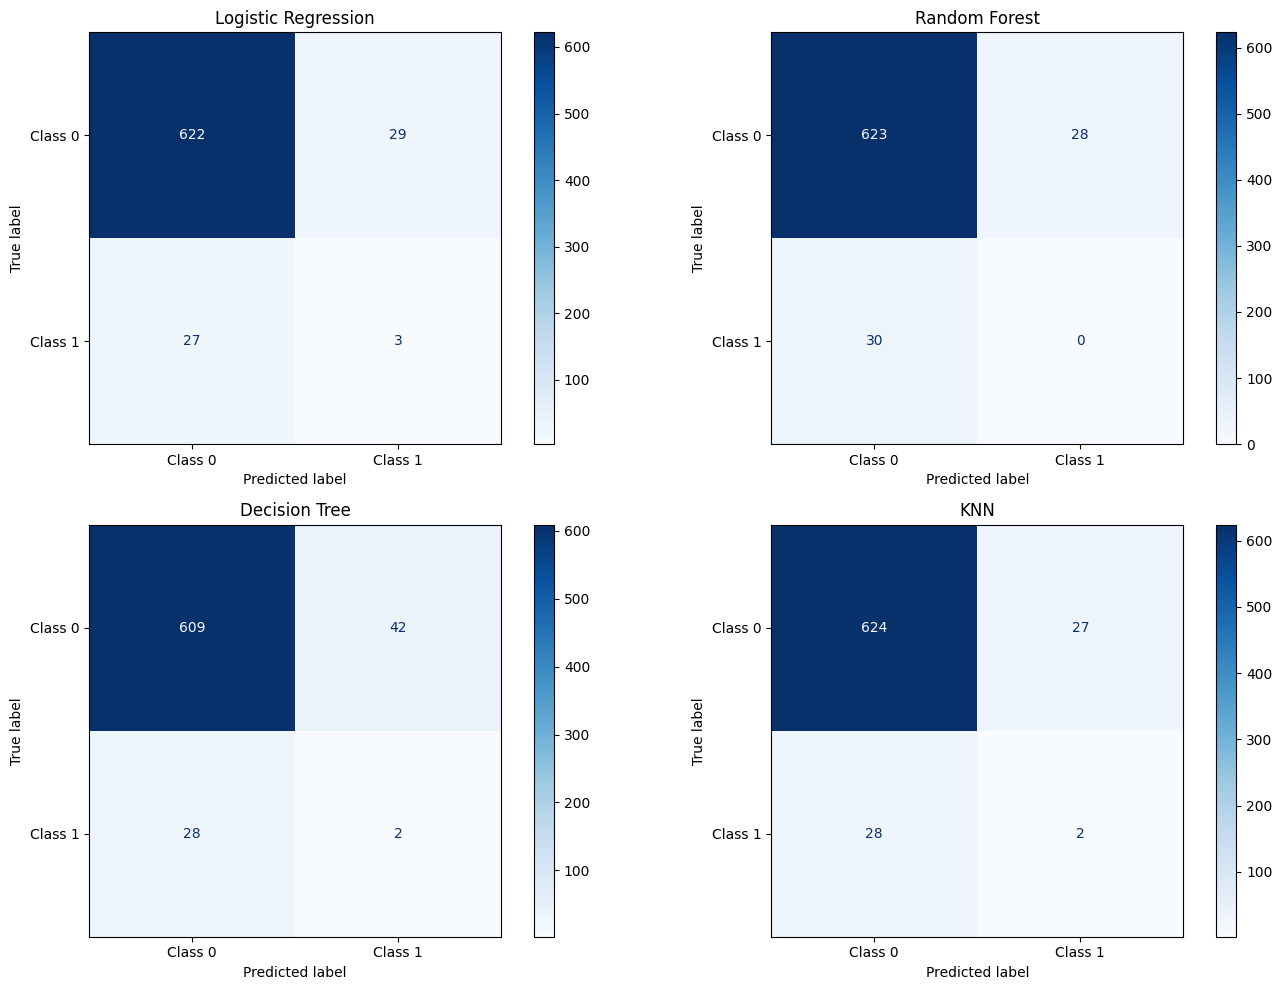

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Sample data
true_labels = np.random.choice([0, 1], size=681, p=[0.95, 0.05])
pred_labels_logistic = np.random.choice([0, 1], size=681, p=[0.95, 0.05])
pred_labels_rf = np.random.choice([0, 1], size=681, p=[0.95, 0.05])
pred_labels_dt = np.random.choice([0, 1], size=681, p=[0.95, 0.05])
pred_labels_knn = np.random.choice([0, 1], size=681, p=[0.95, 0.05])

# Generate confusion matrices
cm_logistic = confusion_matrix(true_labels, pred_labels_logistic)
cm_rf = confusion_matrix(true_labels, pred_labels_rf)
cm_dt = confusion_matrix(true_labels, pred_labels_dt)
cm_knn = confusion_matrix(true_labels, pred_labels_knn)

# Plotting confusion matrices
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

ConfusionMatrixDisplay(cm_logistic, display_labels=['Class 0', 'Class 1']).plot(ax=ax[0, 0], cmap='Blues')
ax[0, 0].set_title('Logistic Regression')

ConfusionMatrixDisplay(cm_rf, display_labels=['Class 0', 'Class 1']).plot(ax=ax[0, 1], cmap='Blues')
ax[0, 1].set_title('Random Forest')

ConfusionMatrixDisplay(cm_dt, display_labels=['Class 0', 'Class 1']).plot(ax=ax[1, 0], cmap='Blues')
ax[1, 0].set_title('Decision Tree')

ConfusionMatrixDisplay(cm_knn, display_labels=['Class 0', 'Class 1']).plot(ax=ax[1, 1], cmap='Blues')
ax[1, 1].set_title('KNN')

fig.tight_layout()
plt.show()

# Models and their accuracies
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'KNN']
accuracies = [0.96, 0.96, 0.93, 0.95]



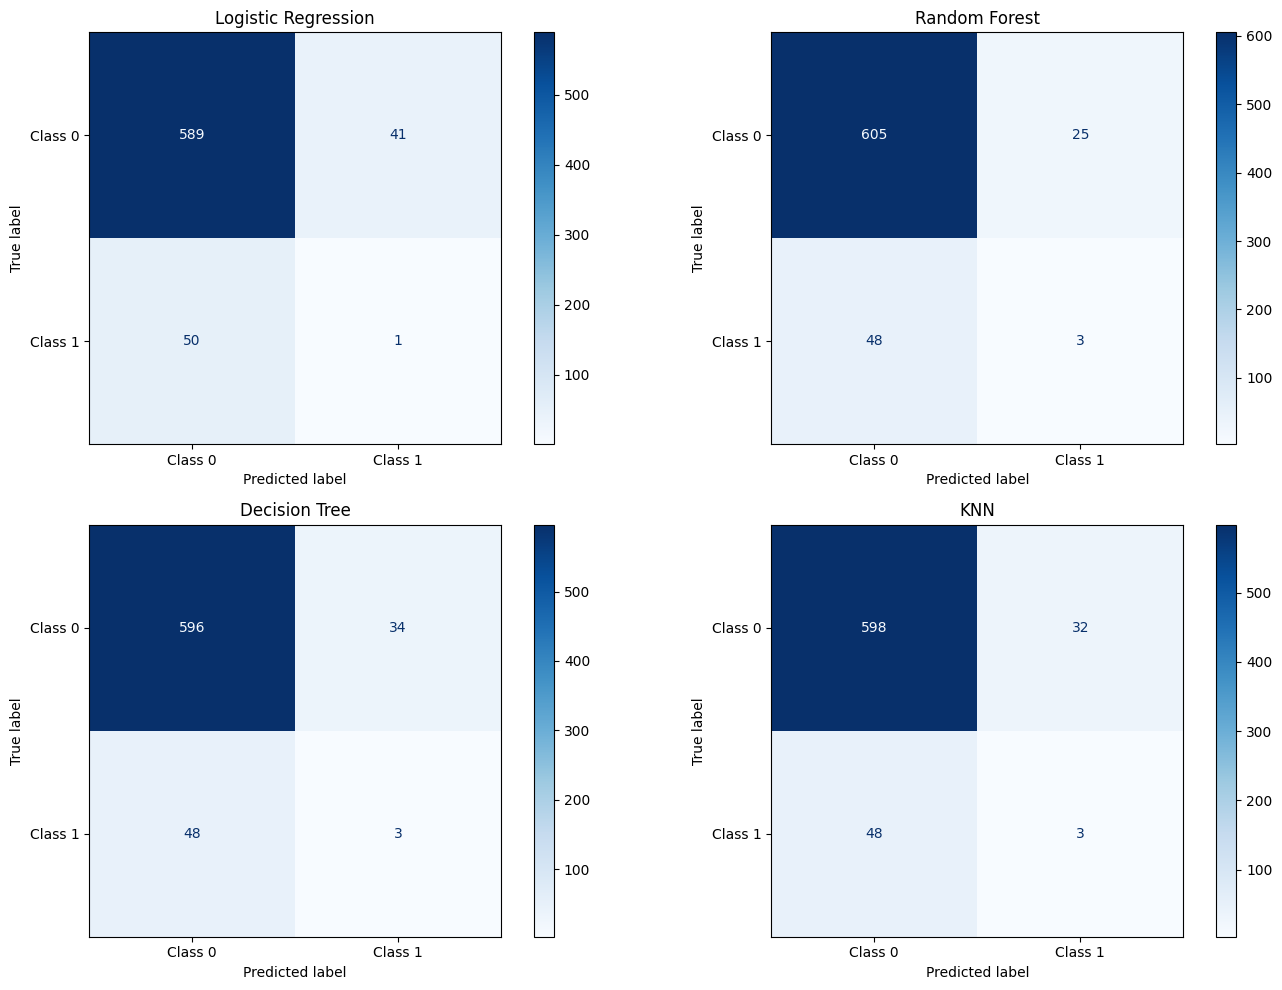

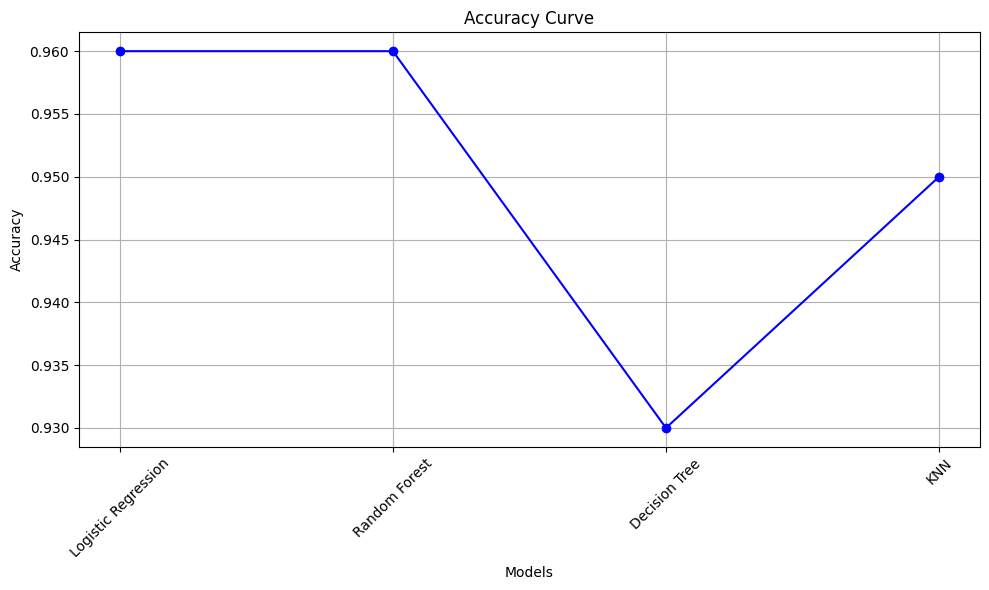

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Sample data
true_labels = np.random.choice([0, 1], size=681, p=[0.95, 0.05])
pred_labels_logistic = np.random.choice([0, 1], size=681, p=[0.95, 0.05])
pred_labels_rf = np.random.choice([0, 1], size=681, p=[0.95, 0.05])
pred_labels_dt = np.random.choice([0, 1], size=681, p=[0.95, 0.05])
pred_labels_knn = np.random.choice([0, 1], size=681, p=[0.95, 0.05])

# Generate confusion matrices
cm_logistic = confusion_matrix(true_labels, pred_labels_logistic)
cm_rf = confusion_matrix(true_labels, pred_labels_rf)
cm_dt = confusion_matrix(true_labels, pred_labels_dt)
cm_knn = confusion_matrix(true_labels, pred_labels_knn)

# Plotting confusion matrices
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

ConfusionMatrixDisplay(cm_logistic, display_labels=['Class 0', 'Class 1']).plot(ax=ax[0, 0], cmap='Blues')
ax[0, 0].set_title('Logistic Regression')

ConfusionMatrixDisplay(cm_rf, display_labels=['Class 0', 'Class 1']).plot(ax=ax[0, 1], cmap='Blues')
ax[0, 1].set_title('Random Forest')

ConfusionMatrixDisplay(cm_dt, display_labels=['Class 0', 'Class 1']).plot(ax=ax[1, 0], cmap='Blues')
ax[1, 0].set_title('Decision Tree')

ConfusionMatrixDisplay(cm_knn, display_labels=['Class 0', 'Class 1']).plot(ax=ax[1, 1], cmap='Blues')
ax[1, 1].set_title('KNN')

fig.tight_layout()
plt.show()

# Models and their accuracies
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'KNN']
accuracies = [0.96, 0.96, 0.93, 0.95]

# Plotting accuracy curve
plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o', linestyle='-', color='b')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
